# Group information
> - Group Members: Morgan Buterbaugh and Benjamin Lawton
> - Names of Datasets: Block 1.1 - Demographics and Block 1.3 - Health used together, Block 2 - Housing, Block 3 - Assets Ownership, Block 7 - Source of Income
> - Project title: Analyzing Socioeconomic Factors and Well-Being in Bhutan: Insights from Integrated Census Data
    - Question 1: Do the living conditions differ based on the respondents major source of income or social income class?
    - Question 2: Does health and well-being differ based on the respondents’ source of income or social income class?
    - Question 3: Does the amount of livestock and land owned correlate with the respondents’ pce?


##  Questions 1: Do the living conditions differ based on the respondents major source of income or social income class?
    - Importance: To determine if there's a major difference in living conditions based on respondents'
     different social income class or their major source of income.
    
    - Datasets used: Block 2 - Housing, and Block 7 - Source of Income
    
    - Features: 'interview__id', 'hs1', 'hs10', 'hs16', 'hs18', 'hs18__1', 'hs18__2', 'hs18__3', 'hs18__4', 'hs23', 'hs24', 'hs25',
     'hs27bi', 'hs27', 'hs30', 'hs32'
    
    - Target(s): 'Major_Source_Income', 'Class'
    

    

##  Questions 2:  Does health and well-being differ based on the respondents’ source of income or social income class?
    - Importance: To determine if there's a major difference in health based on respondents'
    different social income class or major source of income.
    
    - Datasets used: Block 1.1 - Demographics and Block 1.3 - Health used together and Block 7 - Source of Income
    
    - Features: 'interview__id', 'h1', 'h2', 'h5_no_need', 'h5_other_reason',
    'Total_Outpatient_Expenses', 'Total_Inpatient_Expenses', 'Total_Income', 'pce'
    
    - Target(s): 'Major_Source_Income', 'Class'

##  Questions 3: Does the amount of livestock and land owned correlate with the respondents’ pce?
    - Importance: To determine if there are the number of livestock and land owned correlates with personal consumption expenditures.
    
    - Datasets used: Block 3 - Assets Ownership and Block 7 - Source of Income
    
    - Features: 'interview__id', 'Total_Livestock','Total_Spent_On_Livestock', 'Total_Wet_Land_Used', 'Total_Dry_Land_Used',
    'Total_Orchard_Land_Used', 'Total_Land_Used', 'Total_Spent_On_Land'
    
    - Target(s): 'pce_minus_tsLL', 'pce'

## 1. Load the datasets, exam the datasets, including
(DO NOT DROP ANY DATA YET.)

- number of columns
- number of rows
- type of variables for all columns
- numbers of missing values for all columns, and the proportion of missing values for each column
- any numerical summaries for quantitative variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Data Science 2'

Mounted at /content/drive
/content/drive/My Drive/Data Science 2


In [ ]:
#importing block 1
b1 = pd.read_csv("block1_puf.csv")
b1

,Unnamed: 0,interview__id,dcode,gtcode,gtname,clcode,clname,EA,EAname,hhmem,...,h5__3,h5__4,h5__5,h5__6,h5__96,h5o,personid,area,weights,strata
0,0,92b0bbea45f447a5aa4aa898f5977884,19,10,Nyishog,4,Geylegkha_Kuenzangling,2,starting from samtengang pry school till the s...,4,...,NaN,NaN,NaN,NaN,NaN,NaN,92b0bbea45f447a5aa4aa898f597788403,2,23.780945,191042
1,1,92b0bbea45f447a5aa4aa898f5977884,19,10,Nyishog,4,Geylegkha_Kuenzangling,2,starting from samtengang pry school till the s...,4,...,NaN,NaN,NaN,NaN,NaN,NaN,92b0bbea45f447a5aa4aa898f597788404,2,23.780945,191042
2,2,92b0bbea45f447a5aa4aa898f5977884,19,10,Nyishog,4,Geylegkha_Kuenzangling,2,starting from samtengang pry school till the s...,4,...,NaN,NaN,NaN,NaN,NaN,NaN,92b0bbea45f447a5aa4aa898f597788401,2,23.780945,191042
3,3,92b0bbea45f447a5aa4aa898f5977884,19,10,Nyishog,4,Geylegkha_Kuenzangling,2,starting from samtengang pry school till the s...,4,...,NaN,NaN,NaN,NaN,NaN,NaN,92b0bbea45f447a5aa4aa898f597788402,2,23.780945,191042
4,4,a997b58b8bbf4753a77d32de6200a200,20,8,Trong,3,Gongphu,2,East- Forest west-Chakharbi Village.,6,...,NaN,NaN,NaN,NaN,NaN,NaN,a997b58b8bbf4753a77d32de6200a20006,2,6.726651,20832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52817,52817,a488ccd6d2d84ae29dad72f31b104b13,2,51,Phuentshogling Thromde,15,Core l,2,Telecom Tower Area,7,...,NaN,NaN,NaN,NaN,NaN,NaN,a488ccd6d2d84ae29dad72f31b104b1303,1,10.429787,251152
52818,52818,a488ccd6d2d84ae29dad72f31b104b13,2,51,Phuentshogling Thromde,15,Core l,2,Telecom Tower Area,7,...,NaN,NaN,NaN,NaN,NaN,NaN,a488ccd6d2d84ae29dad72f31b104b1301,1,10.429787,251152
52819,52819,ab157bfe784843bc939a57cd38d3eeb5,8,2,Dopshar-ri,5,Rinchhending_Shar-ri,3,opposite to richukha house till lhaden grocery...,3,...,NaN,NaN,NaN,NaN,NaN,NaN,ab157bfe784843bc939a57cd38d3eeb502,2,23.184348,8253
52820,52820,ab157bfe784843bc939a57cd38d3eeb5,8,2,Dopshar-ri,5,Rinchhending_Shar-ri,3,opposite to richukha house till lhaden grocery...,3,...,NaN,NaN,NaN,NaN,NaN,NaN,ab157bfe784843bc939a57cd38d3eeb501,2,23.184348,8253


In [ ]:
b1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52822 entries, 0 to 52821
Data columns (total 138 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Unnamed: 0     int64  
 1    interview__id  object 
 2    dcode          int64  
 3    gtcode         int64  
 4    gtname         object 
 5    clcode         int64  
 6    clname         object 
 7    EA             int64  
 8    EAname         object 
 9    hhmem          int64  
 10   hhroster__id   int64  
 11   slno           int64  
 12   sex            int64  
 13   d2             int64  
 14   d2o            float64
 15   age            int64  
 16   d4             float64
 17   d5             float64
 18   d6             float64
 19   d7             int64  
 20   d8_Months      float64
 21   d8_Days        float64
 22   days_absent    float64
 23   ed1__1         float64
 24   ed1__2         float64
 25   ed1__3         float64
 26   ed1__4         float64
 27   ed2            float64
 28   ed3           

In [ ]:
b1.isnull().sum()

Unnamed: 0           0
interview__id        0
dcode                0
gtcode               0
gtname               0
                 ...  
h5o              52738
personid             0
area                 0
weights              0
strata               0
Length: 138, dtype: int64

In [ ]:
b1.isnull().mean()

Unnamed: 0       0.00000
interview__id    0.00000
dcode            0.00000
gtcode           0.00000
gtname           0.00000
                  ...   
h5o              0.99841
personid         0.00000
area             0.00000
weights          0.00000
strata           0.00000
Length: 138, dtype: float64

In [ ]:
b1.describe()

,Unnamed: 0,dcode,gtcode,clcode,EA,hhmem,hhroster__id,slno,sex,d2,...,h5__1,h5__2,h5__3,h5__4,h5__5,h5__6,h5__96,area,weights,strata
count,52822.000000,52822.000000,52822.00000,52822.000000,52822.000000,52822.000000,52822.000000,52822.000000,52822.000000,52822.000000,...,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,52822.000000,52822.000000,5.282200e+04
mean,26410.500000,10.538336,19.99769,5.307675,2.503635,4.838401,2.962800,2.962800,1.511775,4.703608,...,0.907117,0.024125,0.003016,0.007238,0.016888,0.005428,0.050663,1.697456,12.307721,2.506464e+05
std,15248.542296,5.617190,22.11628,10.204799,2.904091,1.988316,1.836143,1.836143,0.499866,5.760880,...,0.290356,0.153485,0.054849,0.084791,0.128890,0.073498,0.219376,0.459364,10.714743,1.349807e+06
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.421894,1.111000e+03
25%,13205.250000,6.000000,4.00000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.418919,1.021100e+04
50%,26410.500000,11.000000,8.00000,3.000000,1.000000,5.000000,3.000000,3.000000,2.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.794444,1.751100e+04
75%,39615.750000,15.000000,51.00000,5.000000,3.000000,6.000000,4.000000,4.000000,2.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.286656,1.151910e+05
max,52821.000000,20.000000,66.00000,75.000000,27.000000,18.000000,19.000000,19.000000,2.000000,96.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,154.102747,1.451732e+07


There are 52822 rows and 138 columns. The types of variables are float64, int64, and object. The number of missing values were printed along with the percentage in relation to the data frame. The discriptives such as count, mean, std, min, 25%, 50% and 75% confidence intervals and the max.

In [ ]:
#importing block 2
b2 = pd.read_csv("block2_puf.csv")
b2

<ipython-input-8-1f266af377f0>:2: DtypeWarning: Columns (31,42,44,103,115,117,126) have mixed types. Specify dtype option on import or set low_memory=False.
  b2 = pd.read_csv("block2_puf.csv")


,Unnamed: 0,interview__id,dcode,gtcode,gtname,clcode,clname,EA,EAname,hhmem,...,hs36f,hs36g,hs36h,hs36i,hs36o,hs36hj,hs37,hs37a,area,weights
0,0,3ac13effd3004ecaa59b403cf58d71cf,20,62,Tingtibi Town,1,LA 1,5,Main BPC and School,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,4.446429
1,1,f7c9bea28ef54f139f429dc4a7e6afa7,14,51,Thimphu Thromde,38,Core c,8,Core Town H,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,106.237500
2,2,9f9b16b76cb746ca9ee349015245e238,6,5,Maedtsho,2,Gortshom_Tshangthrom-Maed,2,"Starting from Khi Nyel Lhakhang area, khi Nye...",2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,6.065789
3,3,e2c96933cdd84b1da7d6c80e3ede4a0e,6,3,Khoma,1,Babtong_Dragteng,1,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,4.788781
4,4,5a3711ce8f3449bb8411a6e1257aba36,6,8,Tsaenkhar,2,Autsho_Chharbi,1,starting from Artobadep till above Autsho town...,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,6.065789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,13335,be21a35f0f1d4744a6dd8367233c166b,8,51,Paro Town,1,LA 1,4,Wood tech.unit,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,20.260417
13336,13336,8f9862d7e61e4cf0a5af9677a90c16ed,8,61,Beteykha Town,1,LA 1,2,Bitekha Town,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,18.986905
13337,13337,96d0de5f1b144783862a62b5ebd21e7b,1,3,Tang,1,Bepzur_Kuenzangdrag,3,starting from kuenzang drag ney and ends at ab...,6.0,...,NaN,NaN,NaN,NaN,NaN,100000.0,2,NaN,2.0,7.536831
13338,13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,Tang,1,Bepzur_Kuenzangdrag,3,starting from kuenzang drag ney and ends at ab...,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,7.536831


In [ ]:
b2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13340 entries, 0 to 13339
Data columns (total 178 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Unnamed: 0     int64  
 1    interview__id  object 
 2    dcode          int64  
 3    gtcode         int64  
 4    gtname         object 
 5    clcode         int64  
 6    clname         object 
 7    EA             int64  
 8    EAname         object 
 9    hhmem          float64
 10   h6__1          int64  
 11   h6__2          int64  
 12   h6__3          int64  
 13   h6__4          int64  
 14   h6__5          int64  
 15   h6__6          int64  
 16   h6__7          int64  
 17   h6__96         int64  
 18   h6_1           float64
 19   h6_2           float64
 20   h6_3           float64
 21   h6_4           float64
 22   h6_5           float64
 23   h6_6           float64
 24   h6_7           float64
 25   h6_96          float64
 26   hs1            int64  
 27   hs1oth         float64
 28   hs2           

In [ ]:
b2.isnull().sum()

Unnamed: 0           0
interview__id        0
dcode                0
gtcode               0
gtname               0
                 ...  
hs36hj           12724
hs37                 0
hs37a            12373
area                 0
weights              0
Length: 178, dtype: int64

In [ ]:
b2.isnull().mean()

Unnamed: 0       0.000000
interview__id    0.000000
dcode            0.000000
gtcode           0.000000
gtname           0.000000
                   ...   
hs36hj           0.953823
hs37             0.000000
hs37a            0.927511
area             0.000000
weights          0.000000
Length: 178, dtype: float64

In [ ]:
b2.describe()

,Unnamed: 0,dcode,gtcode,clcode,EA,hhmem,h6__1,h6__2,h6__3,h6__4,...,hs36f,hs36g,hs36h,hs36i,hs36o,hs36hj,hs37,hs37a,area,weights
count,13340.00000,13340.000000,13340.000000,13340.00000,13340.000000,13340.000000,13340.000000,13340.000000,13340.000000,13340.000000,...,1.970000e+02,1.110000e+02,6.300000e+01,2.160000e+02,25.000000,6.160000e+02,13340.000000,9.670000e+02,13340.000000,13340.000000
mean,6669.50000,10.528411,21.141154,5.30060,2.575412,3.959670,0.341829,0.119565,0.984258,0.016342,...,1.028228e+05,7.998739e+04,5.438714e+04,1.826037e+05,58544.400000,9.308606e+05,1.927511,1.136313e+05,1.674063,12.318699
std,3851.07063,5.582672,22.569361,10.11303,2.966074,1.865407,0.474340,0.324465,0.124481,0.126791,...,2.800475e+05,3.677070e+05,2.027572e+05,5.018699e+05,147914.029763,3.940580e+06,0.259305,6.473989e+05,0.468741,10.871247
min,0.00000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.800000e+01,2.000000e+02,2.000000e+02,9.000000e+02,300.000000,5.000000e+02,1.000000,1.000000e+02,1.000000,1.421894
25%,3334.75000,6.000000,4.000000,2.00000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,...,5.000000e+03,3.500000e+03,1.500000e+03,7.375000e+03,2000.000000,4.000000e+04,2.000000,5.000000e+03,1.000000,6.418919
50%,6669.50000,11.000000,8.000000,3.00000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000e+04,1.300000e+04,5.000000e+03,3.500000e+04,10000.000000,1.500000e+05,2.000000,2.000000e+04,2.000000,9.856540
75%,10004.25000,15.000000,51.000000,5.00000,3.000000,5.000000,1.000000,0.000000,1.000000,0.000000,...,8.000000e+04,4.750000e+04,1.750000e+04,1.500000e+05,20000.000000,5.000000e+05,2.000000,6.000000e+04,2.000000,13.325982
max,13339.00000,20.000000,66.000000,75.00000,27.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000e+06,3.000000e+06,1.500000e+06,3.700000e+06,700000.000000,7.500000e+07,2.000000,1.300000e+07,2.000000,154.102747


There are 13340 rows and 178 columns. The types of variables are float64, int64, and object. The number of missing values were printed along with the percentage in relation to the data frame. The discriptives such as count, mean, std, min, 25%, 50% and 75% confidence intervals and the max.

In [ ]:
#importing block 3
b3 = pd.read_csv("block3_puf.csv")
b3

<ipython-input-13-f2fc3cd61165>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  b3 = pd.read_csv("block3_puf.csv")


,Unnamed: 0,interview__id,dcode,gtcode,gtname,clcode,clname,EA,EAname,hhmem,...,as4a,as4b,as4c,as4d,as5,as6a,as6b,a,area,weights
0,0,5c41fb302fbc4bcabe8edf11758373eb,1,1,Chhoekhor,1,Dawathang_Dorjibi_ Kashingtsawa,1,from dorjibi till pangri village,4.0,...,0.60,0.0,1.52,0.0,NaN,2,NaN,NaN,2.0,7.629249
1,1,62ea2efe29734a08b881bcdfb80a8fe5,1,1,Chhoekhor,1,Dawathang_Dorjibi_ Kashingtsawa,1,from dorjibi till pangri village,9.0,...,0.50,NaN,NaN,0.7,NaN,2,NaN,NaN,2.0,7.629249
2,2,04e7e6611153432b98b593edb452d591,1,1,Chhoekhor,1,Dawathang_Dorjibi_ Kashingtsawa,1,from dorjibi till pangri village,4.0,...,0.76,NaN,NaN,0.0,0.2,2,NaN,NaN,2.0,7.629249
3,3,bb7eadc9d46246d78b6e1111f81c4168,1,1,Chhoekhor,1,Dawathang_Dorjibi_ Kashingtsawa,1,from dorjibi till pangri village,4.0,...,0.30,0.0,1.18,0.0,NaN,2,NaN,NaN,2.0,7.629249
4,4,aca5278d8371411fa202346570a981cd,1,1,Chhoekhor,1,Dawathang_Dorjibi_ Kashingtsawa,1,from dorjibi till pangri village,4.0,...,0.56,NaN,NaN,0.0,NaN,2,NaN,NaN,2.0,7.629249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,13335,226ff4851b4648a185c38bc17ff9b688,14,7,Naro,1,Barshong_Nango,1,NaN,3.0,...,0.00,0.0,0.30,0.0,NaN,2,NaN,27.0,2.0,15.016043
13336,13336,3f2ac93919964946a363ba1799a199d0,14,7,Naro,1,Barshong_Nango,1,NaN,6.0,...,0.15,NaN,NaN,0.0,NaN,2,NaN,49.0,2.0,15.016043
13337,13337,50277c35870740de91cb3fe4f109d83e,14,7,Naro,1,Barshong_Nango,1,NaN,4.0,...,NaN,NaN,NaN,0.0,NaN,2,NaN,61.0,2.0,15.016043
13338,13338,393430eb571e4c4b85f33ca6b0c38062,14,7,Naro,1,Barshong_Nango,1,NaN,6.0,...,0.60,NaN,NaN,0.0,NaN,2,NaN,43.0,2.0,15.016043


In [ ]:
b3.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13340 entries, 0 to 13339
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13340 non-null  int64  
 1   interview__id  13340 non-null  object 
 2   dcode          13340 non-null  int64  
 3   gtcode         13340 non-null  int64  
 4   gtname         13340 non-null  object 
 5   clcode         13340 non-null  int64  
 6   clname         13340 non-null  object 
 7   EA             13340 non-null  object 
 8   EAname         8018 non-null   object 
 9   hhmem          13340 non-null  float64
 10  as1__101       13340 non-null  int64  
 11  as1__102       13340 non-null  int64  
 12  as1__103       13340 non-null  int64  
 13  as1__104       13340 non-null  int64  
 14  as1__105       13340 non-null  int64  
 15  as1__106       13340 non-null  int64  
 16  as1__107       13340 non-null  int64  
 17  as1__108       13340 non-null  int64  
 18  as1__1

In [ ]:
b3.isnull().sum()

Unnamed: 0           0
interview__id        0
dcode                0
gtcode               0
gtname               0
                 ...  
as6a                 0
as6b             13154
a                13159
area                 0
weights              0
Length: 82, dtype: int64

In [ ]:
b3.isnull().mean()

Unnamed: 0       0.000000
interview__id    0.000000
dcode            0.000000
gtcode           0.000000
gtname           0.000000
                   ...   
as6a             0.000000
as6b             0.986057
a                0.986432
area             0.000000
weights          0.000000
Length: 82, dtype: float64

In [ ]:
b3.describe()

,Unnamed: 0,dcode,gtcode,clcode,hhmem,as1__101,as1__102,as1__103,as1__104,as1__105,...,as4a,as4b,as4c,as4d,as5,as6a,as6b,a,area,weights
count,13340.00000,13340.000000,13340.000000,13340.000000,13340.000000,13340.000000,13340.000000,13340.000000,13340.000000,13340.000000,...,8978.000000,3542.000000,3252.000000,13340.000000,1586.000000,13340.000000,1.860000e+02,181.000000,13340.000000,13340.000000
mean,6669.50000,10.528411,21.141154,5.299700,3.959670,0.976762,0.870015,0.841229,0.722789,0.874213,...,1.428494,0.172916,1.589256,0.067765,1.173676,1.986057,1.127151e+06,91.000000,1.674063,12.318699
std,3851.07063,5.582672,22.569361,10.112657,1.865407,0.150665,0.336300,0.365476,0.447639,0.331622,...,2.031260,0.736106,2.472232,0.760634,1.376338,0.117259,1.375931e+06,52.394338,0.468741,10.871247
min,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,4.000000e+04,1.000000,1.000000,1.421894
25%,3334.75000,6.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.300000,0.000000,0.200000,0.000000,0.400000,2.000000,4.000000e+05,46.000000,1.000000,6.418919
50%,6669.50000,11.000000,8.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.900000,0.000000,0.800000,2.000000,6.675000e+05,91.000000,2.000000,9.856540
75%,10004.25000,15.000000,51.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,0.000000,2.000000,0.000000,1.250000,2.000000,1.282125e+06,136.000000,2.000000,13.325982
max,13339.00000,20.000000,66.000000,75.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,25.000000,12.000000,30.000000,50.000000,12.000000,2.000000,9.500000e+06,181.000000,2.000000,154.102747


There are 13340 rows and 82 columns. The types of variables are float64, int64, and object. The number of missing values were printed along with the percentage in relation to the data frame. The discriptives such as count, mean, std, min, 25%, 50% and 75% confidence intervals and the max.


In [ ]:
#importing block 7
b7 = pd.read_csv("block7_puf.csv")
b7

,Unnamed: 0,interview__id,dcode,gtcode,weights,hhmem,sI1b1,sI1c1,sI1b2,sI1c2,...,SI0__13,SI0__14,SI0__15,SI0__16,SI0__17,SI0__18,SI0__19,SI0__20,SI0__96,pce
0,0,000233e6e354484585c1f2d243b10497,10,10,10.509009,4.0,60000.0,10000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12131.1010
1,1,0005370124c340668360a4798a9af2a6,16,3,5.135135,5.0,65000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8591.5430
2,2,000ec14737034fc4a01e8b8b29b92879,14,51,38.042606,4.0,180000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8308.9140
3,3,001f7295371148b9812b6325e435c27d,15,1,16.761628,6.0,150000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6540.3354
4,4,00201fed04ed4c83b851e5dd95a53edf,5,5,4.449443,6.0,40000.0,0.0,305500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.7124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,13330,fff23c55a920401fad3f1e17720af2da,7,17,13.220833,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6444.3780
13331,13331,fff721cca8e14f3693b58b20ed8a153e,3,4,10.212500,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10149.8660
13332,13332,fff7f8ea5cad47a1893222c168b1386a,18,6,9.199324,6.0,158000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5306.1460
13333,13333,fffa39c7175a4b88a0fc63a47ca2bd64,9,9,15.101010,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4132.1753


In [ ]:
b7.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13335 non-null  int64  
 1   interview__id  13335 non-null  object 
 2   dcode          13335 non-null  int64  
 3   gtcode         13335 non-null  int64  
 4   weights        13335 non-null  float64
 5   hhmem          13335 non-null  float64
 6   sI1b1          13335 non-null  float64
 7   sI1c1          13335 non-null  float64
 8   sI1b2          13335 non-null  float64
 9   sI1c2          13335 non-null  float64
 10  sI1b3          13335 non-null  float64
 11  sI1c3          13335 non-null  float64
 12  sI1b4          13335 non-null  float64
 13  sI1c4          13335 non-null  float64
 14  sI1b5          13335 non-null  float64
 15  sI1c5          13335 non-null  float64
 16  sI1b6          13335 non-null  float64
 17  sI1c6          13335 non-null  float64
 18  sI1b7 

In [ ]:
b7.isnull().sum()

Unnamed: 0       0
interview__id    0
dcode            0
gtcode           0
weights          0
                ..
SI0__18          0
SI0__19          0
SI0__20          0
SI0__96          0
pce              0
Length: 69, dtype: int64

In [ ]:
b7.isnull().mean()

Unnamed: 0       0.0
interview__id    0.0
dcode            0.0
gtcode           0.0
weights          0.0
                ... 
SI0__18          0.0
SI0__19          0.0
SI0__20          0.0
SI0__96          0.0
pce              0.0
Length: 69, dtype: float64

In [ ]:
b7.describe()

,Unnamed: 0,dcode,gtcode,weights,hhmem,sI1b1,sI1c1,sI1b2,sI1c2,sI1b3,...,SI0__13,SI0__14,SI0__15,SI0__16,SI0__17,SI0__18,SI0__19,SI0__20,SI0__96,pce
count,13335.000000,13335.000000,13335.000000,13335.000000,13335.000000,1.333500e+04,1.333500e+04,1.333500e+04,13335.000000,1.333500e+04,...,1.333500e+04,1.333500e+04,13335.000000,13335.000000,1.333500e+04,1.333500e+04,1.333500e+04,13335.000000,1.333500e+04,13335.000000
mean,6667.000000,10.527934,21.129959,12.310009,3.959880,1.772926e+05,1.442342e+03,2.678244e+03,45.109861,1.156763e+04,...,2.583793e+03,1.907736e+04,363.856018,85.440570,1.757960e+03,6.696331e+04,1.600907e+03,98.063367,3.133348e+02,15173.365874
std,3849.627255,5.582691,22.566183,10.838325,1.865299,3.759721e+05,3.564376e+04,2.866450e+04,1499.894687,7.685070e+04,...,3.061728e+04,6.973340e+05,12273.325163,4669.153391,6.161127e+04,7.430958e+05,1.329861e+05,3184.542511,1.428356e+04,14409.700087
min,0.000000,1.000000,1.000000,1.421894,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1343.137700
25%,3333.500000,6.000000,4.000000,6.418919,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,7867.781800
50%,6667.000000,11.000000,8.000000,9.856540,4.000000,8.400000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,11786.176000
75%,10000.500000,15.000000,51.000000,13.325424,5.000000,2.416000e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,17942.698000
max,13334.000000,20.000000,66.000000,154.102747,18.000000,1.200000e+07,3.600000e+06,2.500000e+06,120000.000000,5.000000e+06,...,1.800000e+06,7.452000e+07,1000000.000000,483600.000000,6.000000e+06,5.000000e+07,1.500000e+07,200000.000000,1.500000e+06,481243.900000



There are 13335 rows and 69 columns. The types of variables are float64, int64, and object. The number of missing values were printed along with the percentage in relation to the data frame. The discriptives such as count, mean, std, min, 25%, 50% and 75% confidence intervals and the max.


## 2.  Clean and combine the datasets for each equation

- Change each column name to a meaningful title
- Data Cleaning
    - correct typos
    - remove extra spaces
    - make sure that all data types are correct
    - check if there are any unreasonable numbers
    - check if there are any duplicated records
    - handle missing data
    - and more..
- Join the datasets for the question
- write the cleaned and combined dataset to a csv file after cleaning.


In [ ]:
b13 = pd.read_csv('block1_puf.csv')

In [ ]:
#Cleaning Block 1 to only use some variables from 1.1 and 1.3
#dropping unnecessary columns
b13 = b1.drop(['Unnamed: 0','hhmem','dcode','gtcode','gtname','clcode','clname','EA','EAname','hhroster__id','slno','personid','sex','area','weights','strata',
               'd2','d2o','d4','d5','d6','d7','d8_Months','d8_Days','days_absent',
               'ed1__1','ed1__2','ed1__3','ed1__4','ed2','ed3','ed4','ed5','ed5a','ed5b','ed5b_0','ed5c','ed6','ed6o','ed7','ed8__1','ed8__2','ed8__3','ed8__4','ed8__5','ed8__6','ed8__96','ed8__7','ed8_1','ed8_2','ed8_3','ed8_4','ed8_5','ed8_6','ed8_96','ed9','ed10','ed11','ed12','ed13__1','ed13__2','ed13__3','ed13__4','ed13__5','ed13__6','ed13__96','ed13_1','ed13_2','ed13_3','ed13_4','ed13_5','ed13_6','ed13_96','ed14','ed15__1','ed15__2','ed15__3','ed16','ed17','ed18','ed19','ed19o',
               'h3__1', 'h3__2', 'h3__3', 'h3__4', 'h3__5', 'h3__6', 'h3__7', 'h3__8', 'h3__9', 'h3__10', 'h3__96',
               'h4__1', 'h4__2', 'h4__3', 'h4__4', 'h4__5', 'h4__6', 'h4__7', 'h4__8', 'h4__9', 'h4__96',
               'h5o'
              ],axis=1)
b13

,interview__id,age,h1,h2__1,h2__2,h2__3,h3_1,h3_2,h3_3,h3_4,...,h4_8,h4_9,h4_96,h5__1,h5__2,h5__3,h5__4,h5__5,h5__6,h5__96
0,92b0bbea45f447a5aa4aa898f5977884,67,1,0.0,1.0,0.0,NaN,NaN,NaN,NaN,...,500.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92b0bbea45f447a5aa4aa898f5977884,24,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92b0bbea45f447a5aa4aa898f5977884,47,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,92b0bbea45f447a5aa4aa898f5977884,80,1,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a997b58b8bbf4753a77d32de6200a200,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52817,a488ccd6d2d84ae29dad72f31b104b13,48,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52818,a488ccd6d2d84ae29dad72f31b104b13,47,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52819,ab157bfe784843bc939a57cd38d3eeb5,28,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52820,ab157bfe784843bc939a57cd38d3eeb5,30,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
b13 = b13.fillna(0)

In [ ]:
#Adding total outpatient expenses
col_to_add = ['h3_1', 'h3_2', 'h3_3', 'h3_4', 'h3_5', 'h3_6', 'h3_7', 'h3_8', 'h3_9', 'h3_10', 'h3_96']
b13['Total_Outpatient_Expenses'] = b13[col_to_add].sum(axis=1)
b13['Total_Outpatient_Expenses']

0           0.0
1           0.0
2           0.0
3        2000.0
4           0.0
          ...  
52817       0.0
52818       0.0
52819       0.0
52820       0.0
52821       0.0
Name: Total_Outpatient_Expenses, Length: 52822, dtype: float64

In [ ]:
#Adding total inpatient expenses
col_to_add = ['h4_1', 'h4_2', 'h4_3', 'h4_4', 'h4_5', 'h4_6', 'h4_7', 'h4_8', 'h4_9', 'h4_96']
b13['Total_Inpatient_Expenses'] = b13[col_to_add].sum(axis=1)
b13['Total_Inpatient_Expenses']

0        13700.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
52817        0.0
52818        0.0
52819        0.0
52820        0.0
52821        0.0
Name: Total_Inpatient_Expenses, Length: 52822, dtype: float64

In [ ]:
#Dropping the columns just added to make the two new columns
b13 = b13.drop(['h3_1', 'h3_2', 'h3_3', 'h3_4', 'h3_5', 'h3_6', 'h3_7', 'h3_8', 'h3_9', 'h3_10', 'h3_96',
               'h4_1', 'h4_2', 'h4_3', 'h4_4', 'h4_5', 'h4_6', 'h4_7', 'h4_8', 'h4_9', 'h4_96'
              ],axis=1)
b13

,interview__id,age,h1,h2__1,h2__2,h2__3,h5__1,h5__2,h5__3,h5__4,h5__5,h5__6,h5__96,Total_Outpatient_Expenses,Total_Inpatient_Expenses
0,92b0bbea45f447a5aa4aa898f5977884,67,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13700.0
1,92b0bbea45f447a5aa4aa898f5977884,24,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,92b0bbea45f447a5aa4aa898f5977884,47,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,92b0bbea45f447a5aa4aa898f5977884,80,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0.0
4,a997b58b8bbf4753a77d32de6200a200,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52817,a488ccd6d2d84ae29dad72f31b104b13,48,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52818,a488ccd6d2d84ae29dad72f31b104b13,47,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52819,ab157bfe784843bc939a57cd38d3eeb5,28,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52820,ab157bfe784843bc939a57cd38d3eeb5,30,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
b13.columns

Index(['interview__id', 'age', 'h1', 'h2__1', 'h2__2', 'h2__3', 'h5__1',
       'h5__2', 'h5__3', 'h5__4', 'h5__5', 'h5__6', 'h5__96',
       'Total_Outpatient_Expenses', 'Total_Inpatient_Expenses'],
      dtype='object')

In [ ]:
#combining columns h2__1 and h2__2 to become h2 (asked if went to health facility)
#dropping h2__3 since we now have h2
b13['h2'] = b13['h2__1'] + b13['h2__2']
b13 = b13.drop(['h2__1','h2__2','h2__3'],axis=1)
b13.columns

Index(['interview__id', 'age', 'h1', 'h5__1', 'h5__2', 'h5__3', 'h5__4',
       'h5__5', 'h5__6', 'h5__96', 'Total_Outpatient_Expenses',
       'Total_Inpatient_Expenses', 'h2'],
      dtype='object')

In [ ]:
#fixing to be binary and filling nan with 0
b13.loc[b13['h2'] == 2, 'h2'] = 1
b13.loc[b13['h2'] == 1, 'h2'] = 1
b13['h2'] = b13['h2'].fillna(0)
b13.loc[b13['h1'] == 2, 'h1'] = 0
b13

,interview__id,age,h1,h5__1,h5__2,h5__3,h5__4,h5__5,h5__6,h5__96,Total_Outpatient_Expenses,Total_Inpatient_Expenses,h2
0,92b0bbea45f447a5aa4aa898f5977884,67,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13700.0,1.0
1,92b0bbea45f447a5aa4aa898f5977884,24,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,92b0bbea45f447a5aa4aa898f5977884,47,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,92b0bbea45f447a5aa4aa898f5977884,80,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0.0,1.0
4,a997b58b8bbf4753a77d32de6200a200,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52817,a488ccd6d2d84ae29dad72f31b104b13,48,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52818,a488ccd6d2d84ae29dad72f31b104b13,47,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52819,ab157bfe784843bc939a57cd38d3eeb5,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52820,ab157bfe784843bc939a57cd38d3eeb5,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#renaming and dropping column for not needing to visit health facility
b13['h5_no_need'] = b13['h5__1']
b13 = b13.drop(['h5__1'],axis=1)
b13.columns

Index(['interview__id', 'age', 'h1', 'h5__2', 'h5__3', 'h5__4', 'h5__5',
       'h5__6', 'h5__96', 'Total_Outpatient_Expenses',
       'Total_Inpatient_Expenses', 'h2', 'h5_no_need'],
      dtype='object')

In [ ]:
#creating new column to add togther all other reasons not to visit health facility
#reasons include: no time, no money, no transportation, too far, doesn't trust
col_to_add = ['h5__2', 'h5__3', 'h5__4', 'h5__5', 'h5__6', 'h5__96']
b13['h5_other_reason'] = b13[col_to_add].sum(axis=1)

#making sure data is binary
b13.loc[b13['h5_other_reason'] == 1, 'h5_other_reason'] = 1
b13.loc[b13['h5_other_reason'] == 2, 'h5_other_reason'] = 1
b13.loc[b13['h5_other_reason'] == 3, 'h5_other_reason'] = 1
b13.loc[b13['h5_other_reason'] == 4, 'h5_other_reason'] = 1
b13.loc[b13['h5_other_reason'] == 5, 'h5_other_reason'] = 1
b13.loc[b13['h5_other_reason'] == 6, 'h5_other_reason'] = 1

#dropping columns just used to make new column
b13 = b13.drop(['h5__2', 'h5__3', 'h5__4', 'h5__5', 'h5__6', 'h5__96'],axis=1)
b13.columns

Index(['interview__id', 'age', 'h1', 'Total_Outpatient_Expenses',
       'Total_Inpatient_Expenses', 'h2', 'h5_no_need', 'h5_other_reason'],
      dtype='object')

In [ ]:
b13 = b13.fillna(0)

In [ ]:
#re-ordering columns
b13 = b13[['interview__id','age','h1','h2','h5_no_need','h5_other_reason','Total_Outpatient_Expenses','Total_Inpatient_Expenses']]
b13

,interview__id,age,h1,h2,h5_no_need,h5_other_reason,Total_Outpatient_Expenses,Total_Inpatient_Expenses
0,92b0bbea45f447a5aa4aa898f5977884,67,1,1.0,0.0,0.0,0.0,13700.0
1,92b0bbea45f447a5aa4aa898f5977884,24,0,0.0,0.0,0.0,0.0,0.0
2,92b0bbea45f447a5aa4aa898f5977884,47,0,0.0,0.0,0.0,0.0,0.0
3,92b0bbea45f447a5aa4aa898f5977884,80,1,1.0,0.0,0.0,2000.0,0.0
4,a997b58b8bbf4753a77d32de6200a200,8,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
52817,a488ccd6d2d84ae29dad72f31b104b13,48,0,0.0,0.0,0.0,0.0,0.0
52818,a488ccd6d2d84ae29dad72f31b104b13,47,0,0.0,0.0,0.0,0.0,0.0
52819,ab157bfe784843bc939a57cd38d3eeb5,28,0,0.0,0.0,0.0,0.0,0.0
52820,ab157bfe784843bc939a57cd38d3eeb5,30,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
b2 = pd.read_csv('block2_puf.csv')

<ipython-input-36-0fae059361b8>:1: DtypeWarning: Columns (31,42,44,103,115,117,126) have mixed types. Specify dtype option on import or set low_memory=False.
  b2 = pd.read_csv('block2_puf.csv')


In [ ]:
#Cleaning Block 2
#dropping unnecessary columns
b2 = b2.drop(['Unnamed: 0','hhmem','dcode','gtcode','weights','gtname','clname','clcode','EA','EAname','h6__1', 'h6__2', 'h6__3',
       'h6__4', 'h6__5', 'h6__6', 'h6__7','h6__96','h6_1','h6_2','h6_3','h6_4','h6_5','h6_6','h6_7','h6_96','hs1oth','hs2','hs3','hs4','hs4oth','hs5','hs6','hs6oth','hs7','renter','hs10a','hs11','hs11oth','hs12', 'hs12oth', 'hs13',
       'hs13oth','hs14', 'hs15','hs17__1', 'hs17__2',
       'hs17__3', 'hs17__4', 'hs17a_1','hs17a_2', 'hs17a_3',
       'hs17a_4', 'hs17b__1', 'hs17b__2','hs17b__3', 'hs17b__4',
       'hs17b__5', 'hs17b__6', 'hs17b__7','hs17b__8', 'hs17b__9',
       'hs17b__10', 'hs17b__11', 'hs17b__12','hs17b__13', 'hs17b__96',
       'hs17b_o', 'hs17c__1', 'hs17c__2','hs17c__3', 'hs17c__4',
       'hs17c__5', 'hs17c__6', 'hs17c__7','hs17c__8', 'hs17c__9',
       'hs17c__10', 'hs17c__11', 'hs17c__12','hs17c__13','hs19','hs19Oth','hs20a', 'hs20b','hs21','hs22','hs22a','hs23a__1', 'hs23a__2', 'hs23a__3', 'hs23a__4', 'hs23a__5', 'hs23a__96',
       'hs23a__98', 'hs23Oth','hs24Oth','hs26','hs28a','hs28b','hs29__1', 'hs29__2', 'hs29__3', 'hs29__96',
       'HS29oth','hs30Oth','hs31__1', 'hs31__2', 'hs31__3',
       'hs31__4', 'hs31__5', 'hs31__6', 'hs31__7', 'hs31__96', 'hs31Oth','hs32Oth','hs33__1', 'hs33__2', 'hs33__3',
       'hs33__4', 'hs33__5','hs34', 'hs34a', 'hs34b', 'hs34c', 'hs34d', 'hs34e__1',
       'hs34e__2', 'hs34e__3', 'hs34e__4', 'hs34e__96', 'hs34e_o','hs35','hs36__1', 'hs36__2', 'hs36__3', 'hs36__4', 'hs36__5', 'hs36__6',
       'hs36__7', 'hs36__8', 'hs36__9', 'hs36__96', 'hs36__10','hs36a', 'hs36b', 'hs36c', 'hs36d',
       'hs36e', 'hs36f', 'hs36g', 'hs36h', 'hs36i', 'hs36o', 'hs36hj','hs37','hs37a','area'],axis=1)
b2

,interview__id,hs1,hs10,hs16,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,hs25,hs27,hs30,hs32,hs33a,hs33b,hs33c,hs33d,hs33e,hs33f
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,0,0,0,1,2,2.0,1,1,2,163.0,200.0,1500.0,NaN,2400.0,NaN
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,0,0,0,2,1,2.0,1,1,2,380.0,500.0,3000.0,NaN,1150.0,NaN
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,0,0,1,0,1,2,2.0,1,1,1,20.0,250.0,250.0,NaN,1900.0,NaN
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,0,0,1,0,1,2,2.0,1,1,1,12.0,0.0,150.0,NaN,3324.0,NaN
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,0,0,1,0,1,2,2.0,1,1,7,13.0,0.0,0.0,NaN,2080.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,0,0,0,1,2,2.0,1,1,2,NaN,400.0,1000.0,NaN,3920.0,NaN
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,0,0,0,1,3,2.0,1,1,1,NaN,250.0,60.0,NaN,3600.0,80.0
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,0,0,0,1,2,2.0,1,1,1,NaN,140.0,200.0,NaN,3003.0,50.0
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,0,0,1,0,1,2,2.0,1,1,1,NaN,90.0,230.0,NaN,1013.0,NaN


In [ ]:
#replacing all nan with a 0
b2 = b2.fillna(0)
b2

,interview__id,hs1,hs10,hs16,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,hs25,hs27,hs30,hs32,hs33a,hs33b,hs33c,hs33d,hs33e,hs33f
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,0,0,0,1,2,2.0,1,1,2,163.0,200.0,1500.0,0.0,2400.0,0.0
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,0,0,0,2,1,2.0,1,1,2,380.0,500.0,3000.0,0.0,1150.0,0.0
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,0,0,1,0,1,2,2.0,1,1,1,20.0,250.0,250.0,0.0,1900.0,0.0
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,0,0,1,0,1,2,2.0,1,1,1,12.0,0.0,150.0,0.0,3324.0,0.0
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,0,0,1,0,1,2,2.0,1,1,7,13.0,0.0,0.0,0.0,2080.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,0,0,0,1,2,2.0,1,1,2,0.0,400.0,1000.0,0.0,3920.0,0.0
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,0,0,0,1,3,2.0,1,1,1,0.0,250.0,60.0,0.0,3600.0,80.0
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,0,0,0,1,2,2.0,1,1,1,0.0,140.0,200.0,0.0,3003.0,50.0
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,0,0,1,0,1,2,2.0,1,1,1,0.0,90.0,230.0,0.0,1013.0,0.0


In [ ]:
b2.columns

Index(['interview__id', 'hs1', 'hs10', 'hs16', 'hs18__1', 'hs18__2', 'hs18__3',
       'hs18__4', 'hs23', 'hs24', 'hs25', 'hs27', 'hs30', 'hs32', 'hs33a',
       'hs33b', 'hs33c', 'hs33d', 'hs33e', 'hs33f'],
      dtype='object')

In [ ]:
# creating a column to add all of the monthly resource payments
# have to multiply by 12 since we want the money in terms of years
col_to_add = ['hs33a', 'hs33b', 'hs33c', 'hs33d']
b2['Yearly_Spent'] = (b2[col_to_add].sum(axis=1))*12
b2

,interview__id,hs1,hs10,hs16,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,...,hs27,hs30,hs32,hs33a,hs33b,hs33c,hs33d,hs33e,hs33f,Yearly_Spent
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,0,0,0,1,2,...,1,1,2,163.0,200.0,1500.0,0.0,2400.0,0.0,22356.0
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,0,0,0,2,1,...,1,1,2,380.0,500.0,3000.0,0.0,1150.0,0.0,46560.0
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,0,0,1,0,1,2,...,1,1,1,20.0,250.0,250.0,0.0,1900.0,0.0,6240.0
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,0,0,1,0,1,2,...,1,1,1,12.0,0.0,150.0,0.0,3324.0,0.0,1944.0
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,0,0,1,0,1,2,...,1,1,7,13.0,0.0,0.0,0.0,2080.0,0.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,0,0,0,1,2,...,1,1,2,0.0,400.0,1000.0,0.0,3920.0,0.0,16800.0
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,0,0,0,1,3,...,1,1,1,0.0,250.0,60.0,0.0,3600.0,80.0,3720.0
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,0,0,0,1,2,...,1,1,1,0.0,140.0,200.0,0.0,3003.0,50.0,4080.0
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,0,0,1,0,1,2,...,1,1,1,0.0,90.0,230.0,0.0,1013.0,0.0,3840.0


In [ ]:
# creating a column to add all of the resource payments
col_to_add = ['Yearly_Spent', 'hs33e', 'hs33f']
b2['Yearly_Total'] = b2[col_to_add].sum(axis=1)
b2

,interview__id,hs1,hs10,hs16,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,...,hs30,hs32,hs33a,hs33b,hs33c,hs33d,hs33e,hs33f,Yearly_Spent,Yearly_Total
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,0,0,0,1,2,...,1,2,163.0,200.0,1500.0,0.0,2400.0,0.0,22356.0,24756.0
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,0,0,0,2,1,...,1,2,380.0,500.0,3000.0,0.0,1150.0,0.0,46560.0,47710.0
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,0,0,1,0,1,2,...,1,1,20.0,250.0,250.0,0.0,1900.0,0.0,6240.0,8140.0
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,0,0,1,0,1,2,...,1,1,12.0,0.0,150.0,0.0,3324.0,0.0,1944.0,5268.0
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,0,0,1,0,1,2,...,1,7,13.0,0.0,0.0,0.0,2080.0,0.0,156.0,2236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,0,0,0,1,2,...,1,2,0.0,400.0,1000.0,0.0,3920.0,0.0,16800.0,20720.0
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,0,0,0,1,3,...,1,1,0.0,250.0,60.0,0.0,3600.0,80.0,3720.0,7400.0
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,0,0,0,1,2,...,1,1,0.0,140.0,200.0,0.0,3003.0,50.0,4080.0,7133.0
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,0,0,1,0,1,2,...,1,1,0.0,90.0,230.0,0.0,1013.0,0.0,3840.0,4853.0


In [ ]:
#dropping columns used to make new columns above
b2 = b2.drop(['hs33a', 'hs33b', 'hs33c', 'hs33d','hs33e','hs33f'],axis=1)
b2

,interview__id,hs1,hs10,hs16,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,hs25,hs27,hs30,hs32,Yearly_Spent,Yearly_Total
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,0,0,0,1,2,2.0,1,1,2,22356.0,24756.0
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,0,0,0,2,1,2.0,1,1,2,46560.0,47710.0
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,0,0,1,0,1,2,2.0,1,1,1,6240.0,8140.0
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,0,0,1,0,1,2,2.0,1,1,1,1944.0,5268.0
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,0,0,1,0,1,2,2.0,1,1,7,156.0,2236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,0,0,0,1,2,2.0,1,1,2,16800.0,20720.0
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,0,0,0,1,3,2.0,1,1,1,3720.0,7400.0
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,0,0,0,1,2,2.0,1,1,1,4080.0,7133.0
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,0,0,1,0,1,2,2.0,1,1,1,3840.0,4853.0


In [ ]:
#creating a new column for tv connection and dropping individual variables used
b2['hs18'] = b2['hs18__1'] + b2['hs18__2'] + b2['hs18__3']
b2

,interview__id,hs1,hs10,hs16,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,hs25,hs27,hs30,hs32,Yearly_Spent,Yearly_Total,hs18
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,0,0,0,1,2,2.0,1,1,2,22356.0,24756.0,1
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,0,0,0,2,1,2.0,1,1,2,46560.0,47710.0,1
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,0,0,1,0,1,2,2.0,1,1,1,6240.0,8140.0,1
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,0,0,1,0,1,2,2.0,1,1,1,1944.0,5268.0,1
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,0,0,1,0,1,2,2.0,1,1,7,156.0,2236.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,0,0,0,1,2,2.0,1,1,2,16800.0,20720.0,1
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,0,0,0,1,3,2.0,1,1,1,3720.0,7400.0,1
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,0,0,0,1,2,2.0,1,1,1,4080.0,7133.0,1
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,0,0,1,0,1,2,2.0,1,1,1,3840.0,4853.0,1


In [ ]:
#changing internet availiablity to binary
b2.loc[b2['hs16'] == 2, 'hs16'] = 0

#changing drinking water treatment supply to binary
b2.loc[b2['hs23'] == 2, 'hs23'] = 0

#changing toliet sharing to binary
b2.loc[b2['hs25'] == 2, 'hs25'] = 0

b2

,interview__id,hs1,hs10,hs16,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,hs25,hs27,hs30,hs32,Yearly_Spent,Yearly_Total,hs18
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,0,0,0,1,2,0.0,1,1,2,22356.0,24756.0,1
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,0,0,0,0,1,0.0,1,1,2,46560.0,47710.0,1
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,0,0,1,0,1,2,0.0,1,1,1,6240.0,8140.0,1
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,0,0,1,0,1,2,0.0,1,1,1,1944.0,5268.0,1
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,0,0,1,0,1,2,0.0,1,1,7,156.0,2236.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,0,0,0,1,2,0.0,1,1,2,16800.0,20720.0,1
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,0,0,0,1,3,0.0,1,1,1,3720.0,7400.0,1
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,0,0,0,1,2,0.0,1,1,1,4080.0,7133.0,1
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,0,0,1,0,1,2,0.0,1,1,1,3840.0,4853.0,1


In [ ]:
#changing tv connection to binary
b2.loc[b2['hs18'] == 1, 'hs18'] = 1
b2.loc[b2['hs18'] == 2, 'hs18'] = 1
b2.loc[b2['hs18'] == 3, 'hs18'] = 1

#chaning electricity to binary
b2.loc[b2['hs27'] == 1, 'hs27bi'] = 1
b2.loc[b2['hs27'] == 2, 'hs27bi'] = 1
b2.loc[b2['hs27'] == 3, 'hs27bi'] = 1

b2

,interview__id,hs1,hs10,hs16,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,hs25,hs27,hs30,hs32,Yearly_Spent,Yearly_Total,hs18,hs27bi
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,0,0,0,1,2,0.0,1,1,2,22356.0,24756.0,1,1.0
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,0,0,0,0,1,0.0,1,1,2,46560.0,47710.0,1,1.0
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,0,0,1,0,1,2,0.0,1,1,1,6240.0,8140.0,1,1.0
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,0,0,1,0,1,2,0.0,1,1,1,1944.0,5268.0,1,1.0
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,0,0,1,0,1,2,0.0,1,1,7,156.0,2236.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,0,0,0,1,2,0.0,1,1,2,16800.0,20720.0,1,1.0
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,0,0,0,1,3,0.0,1,1,1,3720.0,7400.0,1,1.0
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,0,0,0,1,2,0.0,1,1,1,4080.0,7133.0,1,1.0
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,0,0,1,0,1,2,0.0,1,1,1,3840.0,4853.0,1,1.0


In [ ]:
#re-ordering columns
b2 = b2[['interview__id', 'hs1', 'hs10', 'hs16','hs18', 'hs18__1', 'hs18__2', 'hs18__3', 'hs18__4',
           'hs23', 'hs24', 'hs25', 'hs27bi' ,'hs27', 'hs30', 'hs32', 'Yearly_Spent', 'Yearly_Total']]
b2

,interview__id,hs1,hs10,hs16,hs18,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,hs25,hs27bi,hs27,hs30,hs32,Yearly_Spent,Yearly_Total
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,1,0,0,0,1,2,0.0,1.0,1,1,2,22356.0,24756.0
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,1,0,0,0,0,1,0.0,1.0,1,1,2,46560.0,47710.0
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,1,0,0,1,0,1,2,0.0,1.0,1,1,1,6240.0,8140.0
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,1,0,0,1,0,1,2,0.0,1.0,1,1,1,1944.0,5268.0
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,1,0,0,1,0,1,2,0.0,1.0,1,1,7,156.0,2236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,1,0,0,0,1,2,0.0,1.0,1,1,2,16800.0,20720.0
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,1,0,0,0,1,3,0.0,1.0,1,1,1,3720.0,7400.0
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,1,0,0,0,1,2,0.0,1.0,1,1,1,4080.0,7133.0
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,1,0,0,1,0,1,2,0.0,1.0,1,1,1,3840.0,4853.0


In [ ]:
b3 = pd.read_csv('block3_puf.csv')

<ipython-input-47-6a862563663c>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  b3 = pd.read_csv('block3_puf.csv')


In [ ]:
#Cleaning Block 3
#dropping unnecessary columns
b3 = b3.drop(['Unnamed: 0','hhmem','dcode','gtcode','gtname','clcode','clname','EA','EAname','area','weights',
              'as2__1', 'as2__2', 'as2__3', 'as2__4', 'as2__5', 'as2__6', 'as2__7', 'as2__8', 'as2__9',
              'as1__101','as1__102','as1__103','as1__104','as1__105','as1__106','as1__107','as1__108','as1__109','as1__110','as1__111','as1__112','as1__113','as1__114','as1__115','as1__116','as1__117','as1__118','as1__119','as1__120','as1__121','as1__122','as1__123','as1__124','as1__125','as1__126','as1__127','as1__128','as1__129','as1__130','as1__131','as1__132',
              'tot_wetland',
              'a','as2a','as6a','as3_1__1','as3_1__2','as3_1__3'
             ],axis=1)
b3

,interview__id,as2_1,as2_2,as2_3,as2_4,as2_5,as2_6,as2_7,as2_8,as2_9,...,as3b,as3c,as3d,as4,as4a,as4b,as4c,as4d,as5,as6b
0,5c41fb302fbc4bcabe8edf11758373eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,2.12,0.60,0.0,1.52,0.0,NaN,NaN
1,62ea2efe29734a08b881bcdfb80a8fe5,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.50,0.50,NaN,NaN,0.7,NaN,NaN
2,04e7e6611153432b98b593edb452d591,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.76,0.76,NaN,NaN,0.0,0.2,NaN
3,bb7eadc9d46246d78b6e1111f81c4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.48,0.30,0.0,1.18,0.0,NaN,NaN
4,aca5278d8371411fa202346570a981cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.56,0.56,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.30,0.00,0.0,0.30,0.0,NaN,NaN
13336,3f2ac93919964946a363ba1799a199d0,NaN,9.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.15,0.15,NaN,NaN,0.0,NaN,NaN
13337,50277c35870740de91cb3fe4f109d83e,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
13338,393430eb571e4c4b85f33ca6b0c38062,NaN,14.0,80.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.60,0.60,NaN,NaN,0.0,NaN,NaN


In [ ]:
b3 = b3.fillna(0)

In [ ]:
#replacing all nan with a 0
b3 = b3.fillna(0)
b3

,interview__id,as2_1,as2_2,as2_3,as2_4,as2_5,as2_6,as2_7,as2_8,as2_9,...,as3b,as3c,as3d,as4,as4a,as4b,as4c,as4d,as5,as6b
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.12,0.60,0.0,1.52,0.0,0.0,0.0
1,62ea2efe29734a08b881bcdfb80a8fe5,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.50,0.50,0.0,0.00,0.7,0.0,0.0
2,04e7e6611153432b98b593edb452d591,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.76,0.76,0.0,0.00,0.0,0.2,0.0
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.48,0.30,0.0,1.18,0.0,0.0,0.0
4,aca5278d8371411fa202346570a981cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.56,0.56,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.30,0.00,0.0,0.30,0.0,0.0,0.0
13336,3f2ac93919964946a363ba1799a199d0,0.0,9.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.15,0.15,0.0,0.00,0.0,0.0,0.0
13337,50277c35870740de91cb3fe4f109d83e,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
13338,393430eb571e4c4b85f33ca6b0c38062,0.0,14.0,80.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.60,0.60,0.0,0.00,0.0,0.0,0.0


In [ ]:
# creating a column to add all of the resource payments
col_to_add = ['as2_1', 'as2_2', 'as2_3', 'as2_4', 'as2_5', 'as2_6', 'as2_7', 'as2_8', 'as2_9']

b3['Total_Livestock'] = b3[col_to_add].sum(axis=1)
b3 = b3.drop(['as2_1', 'as2_2', 'as2_3', 'as2_4', 'as2_5', 'as2_6', 'as2_7', 'as2_8', 'as2_9'],axis=1)
b3

,interview__id,as2b,as3,as3a,as3b,as3c,as3d,as4,as4a,as4b,as4c,as4d,as5,as6b,Total_Livestock
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.00,0.00,0.0,0.0,0.0,2.12,0.60,0.0,1.52,0.0,0.0,0.0,0.0
1,62ea2efe29734a08b881bcdfb80a8fe5,0.0,0.00,0.00,0.0,0.0,0.0,0.50,0.50,0.0,0.00,0.7,0.0,0.0,6.0
2,04e7e6611153432b98b593edb452d591,0.0,0.00,0.00,0.0,0.0,0.0,0.76,0.76,0.0,0.00,0.0,0.2,0.0,1.0
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.00,0.00,0.0,0.0,0.0,1.48,0.30,0.0,1.18,0.0,0.0,0.0,0.0
4,aca5278d8371411fa202346570a981cd,0.0,0.00,0.00,0.0,0.0,0.0,0.56,0.56,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.00,0.00,0.0,0.0,0.0,0.30,0.00,0.0,0.30,0.0,0.0,0.0,0.0
13336,3f2ac93919964946a363ba1799a199d0,0.0,0.34,0.34,0.0,0.0,0.0,0.15,0.15,0.0,0.00,0.0,0.0,0.0,109.0
13337,50277c35870740de91cb3fe4f109d83e,0.0,0.50,0.50,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,3.0
13338,393430eb571e4c4b85f33ca6b0c38062,0.0,0.00,0.00,0.0,0.0,0.0,0.60,0.60,0.0,0.00,0.0,0.0,0.0,134.0


In [ ]:
#renaming as2b to represent total amount $ spent on livestock
b3 = b3.rename(columns={"as2b": "Total_Spent_On_Livestock"})

In [ ]:
#dropping unnecessary columns about the land owned: ie, total land owned, land leased out
b3 = b3.drop(['as3','as3b','as4','as4b'],axis=1)

In [ ]:
#finding the total wet land usage
#dropping wet land variables used: own operated, leased in, fallow/uncultivated
wet_land = ['as3a', 'as3c', 'as3d']

b3['Total_Wet_Land_Used'] = b3[wet_land].sum(axis=1)
b3 = b3.drop(['as3a', 'as3c', 'as3d'],axis=1)
b3

,interview__id,Total_Spent_On_Livestock,as4a,as4c,as4d,as5,as6b,Total_Livestock,Total_Wet_Land_Used
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.60,1.52,0.0,0.0,0.0,0.0,0.00
1,62ea2efe29734a08b881bcdfb80a8fe5,0.0,0.50,0.00,0.7,0.0,0.0,6.0,0.00
2,04e7e6611153432b98b593edb452d591,0.0,0.76,0.00,0.0,0.2,0.0,1.0,0.00
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.30,1.18,0.0,0.0,0.0,0.0,0.00
4,aca5278d8371411fa202346570a981cd,0.0,0.56,0.00,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.00,0.30,0.0,0.0,0.0,0.0,0.00
13336,3f2ac93919964946a363ba1799a199d0,0.0,0.15,0.00,0.0,0.0,0.0,109.0,0.34
13337,50277c35870740de91cb3fe4f109d83e,0.0,0.00,0.00,0.0,0.0,0.0,3.0,0.50
13338,393430eb571e4c4b85f33ca6b0c38062,0.0,0.60,0.00,0.0,0.0,0.0,134.0,0.00


In [ ]:
#finding the total wet land usage
#dropping wet land variables used: own operated, leased in, fallow/uncultivated
dry_land = ['as4a', 'as4c', 'as4d']

b3['Total_Dry_Land_Used'] = b3[dry_land].sum(axis=1)
b3 = b3.drop(['as4a', 'as4c', 'as4d'],axis=1)
b3

,interview__id,Total_Spent_On_Livestock,as5,as6b,Total_Livestock,Total_Wet_Land_Used,Total_Dry_Land_Used
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.0,0.0,0.0,0.00,2.12
1,62ea2efe29734a08b881bcdfb80a8fe5,0.0,0.0,0.0,6.0,0.00,1.20
2,04e7e6611153432b98b593edb452d591,0.0,0.2,0.0,1.0,0.00,0.76
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.0,0.0,0.0,0.00,1.48
4,aca5278d8371411fa202346570a981cd,0.0,0.0,0.0,0.0,0.00,0.56
...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.0,0.0,0.0,0.00,0.30
13336,3f2ac93919964946a363ba1799a199d0,0.0,0.0,0.0,109.0,0.34,0.15
13337,50277c35870740de91cb3fe4f109d83e,0.0,0.0,0.0,3.0,0.50,0.00
13338,393430eb571e4c4b85f33ca6b0c38062,0.0,0.0,0.0,134.0,0.00,0.60


In [ ]:
#renaming as5 for the orchard land used
b3 = b3.rename(columns={"as5": "Total_Orchard_Land_Used"})
b3

,interview__id,Total_Spent_On_Livestock,Total_Orchard_Land_Used,as6b,Total_Livestock,Total_Wet_Land_Used,Total_Dry_Land_Used
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.0,0.0,0.0,0.00,2.12
1,62ea2efe29734a08b881bcdfb80a8fe5,0.0,0.0,0.0,6.0,0.00,1.20
2,04e7e6611153432b98b593edb452d591,0.0,0.2,0.0,1.0,0.00,0.76
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.0,0.0,0.0,0.00,1.48
4,aca5278d8371411fa202346570a981cd,0.0,0.0,0.0,0.0,0.00,0.56
...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.0,0.0,0.0,0.00,0.30
13336,3f2ac93919964946a363ba1799a199d0,0.0,0.0,0.0,109.0,0.34,0.15
13337,50277c35870740de91cb3fe4f109d83e,0.0,0.0,0.0,3.0,0.50,0.00
13338,393430eb571e4c4b85f33ca6b0c38062,0.0,0.0,0.0,134.0,0.00,0.60


In [ ]:
#finding the total land usage
land = ['Total_Wet_Land_Used', 'Total_Dry_Land_Used', 'Total_Orchard_Land_Used']

b3['Total_Land_Used'] = b3[land].sum(axis=1)
b3

,interview__id,Total_Spent_On_Livestock,Total_Orchard_Land_Used,as6b,Total_Livestock,Total_Wet_Land_Used,Total_Dry_Land_Used,Total_Land_Used
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.0,0.0,0.0,0.00,2.12,2.12
1,62ea2efe29734a08b881bcdfb80a8fe5,0.0,0.0,0.0,6.0,0.00,1.20,1.20
2,04e7e6611153432b98b593edb452d591,0.0,0.2,0.0,1.0,0.00,0.76,0.96
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.0,0.0,0.0,0.00,1.48,1.48
4,aca5278d8371411fa202346570a981cd,0.0,0.0,0.0,0.0,0.00,0.56,0.56
...,...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.0,0.0,0.0,0.00,0.30,0.30
13336,3f2ac93919964946a363ba1799a199d0,0.0,0.0,0.0,109.0,0.34,0.15,0.49
13337,50277c35870740de91cb3fe4f109d83e,0.0,0.0,0.0,3.0,0.50,0.00,0.50
13338,393430eb571e4c4b85f33ca6b0c38062,0.0,0.0,0.0,134.0,0.00,0.60,0.60


In [ ]:
#renaming as6a to represent total amount $ spent on land used
b3 = b3.rename(columns={"as6b": "Total_Spent_On_Land"})
b3

,interview__id,Total_Spent_On_Livestock,Total_Orchard_Land_Used,Total_Spent_On_Land,Total_Livestock,Total_Wet_Land_Used,Total_Dry_Land_Used,Total_Land_Used
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.0,0.0,0.0,0.00,2.12,2.12
1,62ea2efe29734a08b881bcdfb80a8fe5,0.0,0.0,0.0,6.0,0.00,1.20,1.20
2,04e7e6611153432b98b593edb452d591,0.0,0.2,0.0,1.0,0.00,0.76,0.96
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.0,0.0,0.0,0.00,1.48,1.48
4,aca5278d8371411fa202346570a981cd,0.0,0.0,0.0,0.0,0.00,0.56,0.56
...,...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.0,0.0,0.0,0.00,0.30,0.30
13336,3f2ac93919964946a363ba1799a199d0,0.0,0.0,0.0,109.0,0.34,0.15,0.49
13337,50277c35870740de91cb3fe4f109d83e,0.0,0.0,0.0,3.0,0.50,0.00,0.50
13338,393430eb571e4c4b85f33ca6b0c38062,0.0,0.0,0.0,134.0,0.00,0.60,0.60


In [ ]:
#creating a column for total spent on livestock and land together
b3['Total_Spent_LL'] = b3['Total_Spent_On_Livestock'] + b3['Total_Spent_On_Land']
b3

,interview__id,Total_Spent_On_Livestock,Total_Orchard_Land_Used,Total_Spent_On_Land,Total_Livestock,Total_Wet_Land_Used,Total_Dry_Land_Used,Total_Land_Used,Total_Spent_LL
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.0,0.0,0.0,0.00,2.12,2.12,0.0
1,62ea2efe29734a08b881bcdfb80a8fe5,0.0,0.0,0.0,6.0,0.00,1.20,1.20,0.0
2,04e7e6611153432b98b593edb452d591,0.0,0.2,0.0,1.0,0.00,0.76,0.96,0.0
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.0,0.0,0.0,0.00,1.48,1.48,0.0
4,aca5278d8371411fa202346570a981cd,0.0,0.0,0.0,0.0,0.00,0.56,0.56,0.0
...,...,...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.0,0.0,0.0,0.00,0.30,0.30,0.0
13336,3f2ac93919964946a363ba1799a199d0,0.0,0.0,0.0,109.0,0.34,0.15,0.49,0.0
13337,50277c35870740de91cb3fe4f109d83e,0.0,0.0,0.0,3.0,0.50,0.00,0.50,0.0
13338,393430eb571e4c4b85f33ca6b0c38062,0.0,0.0,0.0,134.0,0.00,0.60,0.60,0.0


In [ ]:
b3 = b3.fillna(0)

In [ ]:
#re-ordering columns
b3 = b3[['interview__id', 'Total_Livestock', 'Total_Spent_On_Livestock','Total_Wet_Land_Used', 'Total_Dry_Land_Used', 'Total_Orchard_Land_Used', 'Total_Land_Used', 'Total_Spent_On_Land', 'Total_Spent_LL']]
b3

,interview__id,Total_Livestock,Total_Spent_On_Livestock,Total_Wet_Land_Used,Total_Dry_Land_Used,Total_Orchard_Land_Used,Total_Land_Used,Total_Spent_On_Land,Total_Spent_LL
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.0,0.00,2.12,0.0,2.12,0.0,0.0
1,62ea2efe29734a08b881bcdfb80a8fe5,6.0,0.0,0.00,1.20,0.0,1.20,0.0,0.0
2,04e7e6611153432b98b593edb452d591,1.0,0.0,0.00,0.76,0.2,0.96,0.0,0.0
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.0,0.00,1.48,0.0,1.48,0.0,0.0
4,aca5278d8371411fa202346570a981cd,0.0,0.0,0.00,0.56,0.0,0.56,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.0,0.00,0.30,0.0,0.30,0.0,0.0
13336,3f2ac93919964946a363ba1799a199d0,109.0,0.0,0.34,0.15,0.0,0.49,0.0,0.0
13337,50277c35870740de91cb3fe4f109d83e,3.0,0.0,0.50,0.00,0.0,0.50,0.0,0.0
13338,393430eb571e4c4b85f33ca6b0c38062,134.0,0.0,0.00,0.60,0.0,0.60,0.0,0.0


In [ ]:
b7 = pd.read_csv('block7_puf.csv')

In [ ]:
#Cleaning Block 7
#dropping unnecessary columns
b7 = b7.drop(['Unnamed: 0','hhmem','dcode','gtcode','weights','sI1b1', 'sI1c1', 'sI1b2', 'sI1c2', 'sI1b3', 'sI1c3', 'sI1b4', 'sI1c4',
              'sI1b5', 'sI1c5', 'sI1b6', 'sI1c6', 'sI1b7', 'sI1c7', 'sI1b8', 'sI1c8', 'sI1b9', 'sI1c9', 'sI1b10', 'sI1c10',
              'sI1b11', 'sI1c11', 'sI1b12', 'sI1c12', 'sI1b13', 'sI1c13', 'sI1b14', 'sI1c14', 'sI1b15', 'sI1c15', 'sI1b16', 'sI1c16',
              'sI1b17', 'sI1c17', 'sI1b18',  'sI1c18', 'sI1b19', 'sI1c19', 'sI1c20', 'sI1b96', 'sI1c96'],axis=1)
b7

,interview__id,SI0__1,SI0__2,SI0__3,SI0__4,SI0__5,SI0__6,SI0__7,SI0__8,SI0__9,...,SI0__13,SI0__14,SI0__15,SI0__16,SI0__17,SI0__18,SI0__19,SI0__20,SI0__96,pce
0,000233e6e354484585c1f2d243b10497,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12131.1010
1,0005370124c340668360a4798a9af2a6,65000.0,0.0,0.0,6000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8591.5430
2,000ec14737034fc4a01e8b8b29b92879,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8308.9140
3,001f7295371148b9812b6325e435c27d,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6540.3354
4,00201fed04ed4c83b851e5dd95a53edf,40000.0,305500.0,0.0,3000.0,0.0,20000.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.7124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,0.0,0.0,2000.0,0.0,0.0,8500.0,8400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6444.3780
13331,fff721cca8e14f3693b58b20ed8a153e,0.0,0.0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10149.8660
13332,fff7f8ea5cad47a1893222c168b1386a,158000.0,0.0,0.0,40000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5306.1460
13333,fffa39c7175a4b88a0fc63a47ca2bd64,0.0,0.0,0.0,0.0,0.0,50000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4132.1753


In [ ]:
#seeing the names of all the columns left in the dataframe
b7.columns

Index(['interview__id', 'SI0__1', 'SI0__2', 'SI0__3', 'SI0__4', 'SI0__5',
       'SI0__6', 'SI0__7', 'SI0__8', 'SI0__9', 'SI0__10', 'SI0__11', 'SI0__12',
       'SI0__13', 'SI0__14', 'SI0__15', 'SI0__16', 'SI0__17', 'SI0__18',
       'SI0__19', 'SI0__20', 'SI0__96', 'pce'],
      dtype='object')

In [ ]:
# creating a column to add all of the income sources for the year
col_to_add = ['SI0__1', 'SI0__2', 'SI0__3', 'SI0__4', 'SI0__5', 'SI0__6', 'SI0__7',
       'SI0__8', 'SI0__9', 'SI0__10', 'SI0__11', 'SI0__12', 'SI0__13',
       'SI0__14', 'SI0__15', 'SI0__16', 'SI0__17', 'SI0__18', 'SI0__19',
       'SI0__20', 'SI0__96']

b7['Total_Income'] = b7[col_to_add].sum(axis=1)
b7

,interview__id,SI0__1,SI0__2,SI0__3,SI0__4,SI0__5,SI0__6,SI0__7,SI0__8,SI0__9,...,SI0__14,SI0__15,SI0__16,SI0__17,SI0__18,SI0__19,SI0__20,SI0__96,pce,Total_Income
0,000233e6e354484585c1f2d243b10497,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12131.1010,70000.0
1,0005370124c340668360a4798a9af2a6,65000.0,0.0,0.0,6000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8591.5430,71000.0
2,000ec14737034fc4a01e8b8b29b92879,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8308.9140,180000.0
3,001f7295371148b9812b6325e435c27d,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6540.3354,200000.0
4,00201fed04ed4c83b851e5dd95a53edf,40000.0,305500.0,0.0,3000.0,0.0,20000.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.7124,370500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,0.0,0.0,2000.0,0.0,0.0,8500.0,8400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6444.3780,18900.0
13331,fff721cca8e14f3693b58b20ed8a153e,0.0,0.0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10149.8660,50000.0
13332,fff7f8ea5cad47a1893222c168b1386a,158000.0,0.0,0.0,40000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5306.1460,198000.0
13333,fffa39c7175a4b88a0fc63a47ca2bd64,0.0,0.0,0.0,0.0,0.0,50000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4132.1753,50000.0


In [ ]:
# creating a column to calculate the total amount of profit for the year
b7['Final_Money'] = b7['Total_Income'] - b7['pce']
b7

,interview__id,SI0__1,SI0__2,SI0__3,SI0__4,SI0__5,SI0__6,SI0__7,SI0__8,SI0__9,...,SI0__15,SI0__16,SI0__17,SI0__18,SI0__19,SI0__20,SI0__96,pce,Total_Income,Final_Money
0,000233e6e354484585c1f2d243b10497,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12131.1010,70000.0,57868.8990
1,0005370124c340668360a4798a9af2a6,65000.0,0.0,0.0,6000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8591.5430,71000.0,62408.4570
2,000ec14737034fc4a01e8b8b29b92879,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8308.9140,180000.0,171691.0860
3,001f7295371148b9812b6325e435c27d,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6540.3354,200000.0,193459.6646
4,00201fed04ed4c83b851e5dd95a53edf,40000.0,305500.0,0.0,3000.0,0.0,20000.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.7124,370500.0,364113.2876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,0.0,0.0,2000.0,0.0,0.0,8500.0,8400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6444.3780,18900.0,12455.6220
13331,fff721cca8e14f3693b58b20ed8a153e,0.0,0.0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10149.8660,50000.0,39850.1340
13332,fff7f8ea5cad47a1893222c168b1386a,158000.0,0.0,0.0,40000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5306.1460,198000.0,192693.8540
13333,fffa39c7175a4b88a0fc63a47ca2bd64,0.0,0.0,0.0,0.0,0.0,50000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4132.1753,50000.0,45867.8247


In [ ]:
#creating column to combine total $ from food income and dropping the food variables
#dropped: cerreal, fruits, vegetables, meat, dairy products, eggs variables
food = ['SI0__2', 'SI0__3', 'SI0__4', 'SI0__5', 'SI0__6', 'SI0__7']

b7['Food'] = b7[food].sum(axis=1)
b7 = b7.drop(['SI0__2', 'SI0__3', 'SI0__4', 'SI0__5', 'SI0__6', 'SI0__7'],axis=1)
b7

,interview__id,SI0__1,SI0__8,SI0__9,SI0__10,SI0__11,SI0__12,SI0__13,SI0__14,SI0__15,SI0__16,SI0__17,SI0__18,SI0__19,SI0__20,SI0__96,pce,Total_Income,Final_Money,Food
0,000233e6e354484585c1f2d243b10497,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12131.1010,70000.0,57868.8990,0.0
1,0005370124c340668360a4798a9af2a6,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8591.5430,71000.0,62408.4570,6000.0
2,000ec14737034fc4a01e8b8b29b92879,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8308.9140,180000.0,171691.0860,0.0
3,001f7295371148b9812b6325e435c27d,150000.0,0.0,0.0,0.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6540.3354,200000.0,193459.6646,0.0
4,00201fed04ed4c83b851e5dd95a53edf,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.7124,370500.0,364113.2876,330500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6444.3780,18900.0,12455.6220,18900.0
13331,fff721cca8e14f3693b58b20ed8a153e,0.0,0.0,0.0,0.0,0.0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10149.8660,50000.0,39850.1340,25000.0
13332,fff7f8ea5cad47a1893222c168b1386a,158000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5306.1460,198000.0,192693.8540,40000.0
13333,fffa39c7175a4b88a0fc63a47ca2bd64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4132.1753,50000.0,45867.8247,50000.0


In [ ]:
#creating column to combine total $ from products income and dropping the products variables
#dropped: forest wood priducts, non-wood forest products, pottering, weaving
products = ['SI0__8', 'SI0__9', 'SI0__10', 'SI0__11']

b7['Products'] = b7[products].sum(axis=1)
b7 = b7.drop(['SI0__8', 'SI0__9', 'SI0__10', 'SI0__11'],axis=1)
b7

,interview__id,SI0__1,SI0__12,SI0__13,SI0__14,SI0__15,SI0__16,SI0__17,SI0__18,SI0__19,SI0__20,SI0__96,pce,Total_Income,Final_Money,Food,Products
0,000233e6e354484585c1f2d243b10497,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12131.1010,70000.0,57868.8990,0.0,0.0
1,0005370124c340668360a4798a9af2a6,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8591.5430,71000.0,62408.4570,6000.0,0.0
2,000ec14737034fc4a01e8b8b29b92879,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8308.9140,180000.0,171691.0860,0.0,0.0
3,001f7295371148b9812b6325e435c27d,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6540.3354,200000.0,193459.6646,0.0,50000.0
4,00201fed04ed4c83b851e5dd95a53edf,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.7124,370500.0,364113.2876,330500.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6444.3780,18900.0,12455.6220,18900.0,0.0
13331,fff721cca8e14f3693b58b20ed8a153e,0.0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10149.8660,50000.0,39850.1340,25000.0,0.0
13332,fff7f8ea5cad47a1893222c168b1386a,158000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5306.1460,198000.0,192693.8540,40000.0,0.0
13333,fffa39c7175a4b88a0fc63a47ca2bd64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4132.1753,50000.0,45867.8247,50000.0,0.0


In [ ]:
#creating column to combine total $ from work earnings income and dropping the work earngins variables
#dropped: wages/salaries, pensions, rental/real estate, net income from buisness, interest income
work_earnings = ['SI0__1', 'SI0__13', 'SI0__14','SI0__18', 'SI0__19']

b7['Work_Earnings'] = b7[work_earnings].sum(axis=1)
b7 = b7.drop(['SI0__1', 'SI0__13', 'SI0__14','SI0__18', 'SI0__19'],axis=1)
b7

,interview__id,SI0__12,SI0__15,SI0__16,SI0__17,SI0__20,SI0__96,pce,Total_Income,Final_Money,Food,Products,Work_Earnings
0,000233e6e354484585c1f2d243b10497,0.0,0.0,0.0,0.0,0.0,0.0,12131.1010,70000.0,57868.8990,0.0,0.0,70000.0
1,0005370124c340668360a4798a9af2a6,0.0,0.0,0.0,0.0,0.0,0.0,8591.5430,71000.0,62408.4570,6000.0,0.0,65000.0
2,000ec14737034fc4a01e8b8b29b92879,0.0,0.0,0.0,0.0,0.0,0.0,8308.9140,180000.0,171691.0860,0.0,0.0,180000.0
3,001f7295371148b9812b6325e435c27d,0.0,0.0,0.0,0.0,0.0,0.0,6540.3354,200000.0,193459.6646,0.0,50000.0,150000.0
4,00201fed04ed4c83b851e5dd95a53edf,0.0,0.0,0.0,0.0,0.0,0.0,6386.7124,370500.0,364113.2876,330500.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,0.0,0.0,0.0,0.0,0.0,0.0,6444.3780,18900.0,12455.6220,18900.0,0.0,0.0
13331,fff721cca8e14f3693b58b20ed8a153e,25000.0,0.0,0.0,0.0,0.0,0.0,10149.8660,50000.0,39850.1340,25000.0,0.0,0.0
13332,fff7f8ea5cad47a1893222c168b1386a,0.0,0.0,0.0,0.0,0.0,0.0,5306.1460,198000.0,192693.8540,40000.0,0.0,158000.0
13333,fffa39c7175a4b88a0fc63a47ca2bd64,0.0,0.0,0.0,0.0,0.0,0.0,4132.1753,50000.0,45867.8247,50000.0,0.0,0.0


In [ ]:
#creating column to combine total $ from other income and dropping the other variables
#dropped: remittances received, inheritance, scholarships, sale of assets, socail transfer, other
other = ['SI0__12','SI0__15', 'SI0__16', 'SI0__17', 'SI0__20', 'SI0__96']

b7['Other'] = b7[other].sum(axis=1)
b7 = b7.drop(['SI0__12','SI0__15', 'SI0__16', 'SI0__17', 'SI0__20', 'SI0__96'],axis=1)
b7

,interview__id,pce,Total_Income,Final_Money,Food,Products,Work_Earnings,Other
0,000233e6e354484585c1f2d243b10497,12131.1010,70000.0,57868.8990,0.0,0.0,70000.0,0.0
1,0005370124c340668360a4798a9af2a6,8591.5430,71000.0,62408.4570,6000.0,0.0,65000.0,0.0
2,000ec14737034fc4a01e8b8b29b92879,8308.9140,180000.0,171691.0860,0.0,0.0,180000.0,0.0
3,001f7295371148b9812b6325e435c27d,6540.3354,200000.0,193459.6646,0.0,50000.0,150000.0,0.0
4,00201fed04ed4c83b851e5dd95a53edf,6386.7124,370500.0,364113.2876,330500.0,0.0,40000.0,0.0
...,...,...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,6444.3780,18900.0,12455.6220,18900.0,0.0,0.0,0.0
13331,fff721cca8e14f3693b58b20ed8a153e,10149.8660,50000.0,39850.1340,25000.0,0.0,0.0,25000.0
13332,fff7f8ea5cad47a1893222c168b1386a,5306.1460,198000.0,192693.8540,40000.0,0.0,158000.0,0.0
13333,fffa39c7175a4b88a0fc63a47ca2bd64,4132.1753,50000.0,45867.8247,50000.0,0.0,0.0,0.0


In [ ]:
#making a column that determines the major source of income
#comparing if food, products, work_earnings, and other and seeing which one is greater
#work_earnings=1,food=2, products=3, and other =4
b7['Major_Source_Income'] = b7[['Work_Earnings', 'Food', 'Products', 'Other']].idxmax(axis=1)
b7['Major_Source_Income'] = b7['Major_Source_Income'].replace(['Work_Earnings', 'Food', 'Products', 'Other'], [1, 2, 3, 4])

#dropping 'food', 'products', 'work_earnings', and 'other' columns
b7 = b7.drop(['Work_Earnings', 'Food', 'Products', 'Other'],axis=1)
b7

,interview__id,pce,Total_Income,Final_Money,Major_Source_Income
0,000233e6e354484585c1f2d243b10497,12131.1010,70000.0,57868.8990,1
1,0005370124c340668360a4798a9af2a6,8591.5430,71000.0,62408.4570,1
2,000ec14737034fc4a01e8b8b29b92879,8308.9140,180000.0,171691.0860,1
3,001f7295371148b9812b6325e435c27d,6540.3354,200000.0,193459.6646,1
4,00201fed04ed4c83b851e5dd95a53edf,6386.7124,370500.0,364113.2876,2
...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,6444.3780,18900.0,12455.6220,2
13331,fff721cca8e14f3693b58b20ed8a153e,10149.8660,50000.0,39850.1340,2
13332,fff7f8ea5cad47a1893222c168b1386a,5306.1460,198000.0,192693.8540,1
13333,fffa39c7175a4b88a0fc63a47ca2bd64,4132.1753,50000.0,45867.8247,2


In [ ]:
#making a column that determines the social income class
#low=1, middle=2, high=3
b7['Class'] = pd.qcut(b7['Final_Money'], 3, labels=['low', 'middle', 'high'])
b7['Class'] = b7['Class'].replace(['low', 'middle', 'high'], [1, 2, 3])

income_tiers = b7['Class'].value_counts()
print(income_tiers)
b7

1    4445
2    4445
3    4445
Name: Class, dtype: int64


,interview__id,pce,Total_Income,Final_Money,Major_Source_Income,Class
0,000233e6e354484585c1f2d243b10497,12131.1010,70000.0,57868.8990,1,1
1,0005370124c340668360a4798a9af2a6,8591.5430,71000.0,62408.4570,1,1
2,000ec14737034fc4a01e8b8b29b92879,8308.9140,180000.0,171691.0860,1,2
3,001f7295371148b9812b6325e435c27d,6540.3354,200000.0,193459.6646,1,2
4,00201fed04ed4c83b851e5dd95a53edf,6386.7124,370500.0,364113.2876,2,3
...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,6444.3780,18900.0,12455.6220,2,1
13331,fff721cca8e14f3693b58b20ed8a153e,10149.8660,50000.0,39850.1340,2,1
13332,fff7f8ea5cad47a1893222c168b1386a,5306.1460,198000.0,192693.8540,1,2
13333,fffa39c7175a4b88a0fc63a47ca2bd64,4132.1753,50000.0,45867.8247,2,1


In [ ]:
b7.Class.unique()

[1, 2, 3]
Categories (3, int64): [1 < 2 < 3]

In [ ]:
b7 = b7.fillna(0)

In [ ]:
#re-ordering columns
b7 = b7[['interview__id', 'Total_Income', 'pce', 'Final_Money', 'Major_Source_Income', 'Class']]
b7

,interview__id,Total_Income,pce,Final_Money,Major_Source_Income,Class
0,000233e6e354484585c1f2d243b10497,70000.0,12131.1010,57868.8990,1,1
1,0005370124c340668360a4798a9af2a6,71000.0,8591.5430,62408.4570,1,1
2,000ec14737034fc4a01e8b8b29b92879,180000.0,8308.9140,171691.0860,1,2
3,001f7295371148b9812b6325e435c27d,200000.0,6540.3354,193459.6646,1,2
4,00201fed04ed4c83b851e5dd95a53edf,370500.0,6386.7124,364113.2876,2,3
...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,18900.0,6444.3780,12455.6220,2,1
13331,fff721cca8e14f3693b58b20ed8a153e,50000.0,10149.8660,39850.1340,2,1
13332,fff7f8ea5cad47a1893222c168b1386a,198000.0,5306.1460,192693.8540,1,2
13333,fffa39c7175a4b88a0fc63a47ca2bd64,50000.0,4132.1753,45867.8247,2,1


## 2b. Blocks


In [ ]:
b13

,interview__id,age,h1,h2,h5_no_need,h5_other_reason,Total_Outpatient_Expenses,Total_Inpatient_Expenses
0,92b0bbea45f447a5aa4aa898f5977884,67,1,1.0,0.0,0.0,0.0,13700.0
1,92b0bbea45f447a5aa4aa898f5977884,24,0,0.0,0.0,0.0,0.0,0.0
2,92b0bbea45f447a5aa4aa898f5977884,47,0,0.0,0.0,0.0,0.0,0.0
3,92b0bbea45f447a5aa4aa898f5977884,80,1,1.0,0.0,0.0,2000.0,0.0
4,a997b58b8bbf4753a77d32de6200a200,8,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
52817,a488ccd6d2d84ae29dad72f31b104b13,48,0,0.0,0.0,0.0,0.0,0.0
52818,a488ccd6d2d84ae29dad72f31b104b13,47,0,0.0,0.0,0.0,0.0,0.0
52819,ab157bfe784843bc939a57cd38d3eeb5,28,0,0.0,0.0,0.0,0.0,0.0
52820,ab157bfe784843bc939a57cd38d3eeb5,30,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
b2

,interview__id,hs1,hs10,hs16,hs18,hs18__1,hs18__2,hs18__3,hs18__4,hs23,hs24,hs25,hs27bi,hs27,hs30,hs32,Yearly_Spent,Yearly_Total
0,3ac13effd3004ecaa59b403cf58d71cf,2,3,1,1,1,0,0,0,1,2,0.0,1.0,1,1,2,22356.0,24756.0
1,f7c9bea28ef54f139f429dc4a7e6afa7,2,2,1,1,1,0,0,0,0,1,0.0,1.0,1,1,2,46560.0,47710.0
2,9f9b16b76cb746ca9ee349015245e238,1,7,1,1,0,0,1,0,1,2,0.0,1.0,1,1,1,6240.0,8140.0
3,e2c96933cdd84b1da7d6c80e3ede4a0e,1,3,1,1,0,0,1,0,1,2,0.0,1.0,1,1,1,1944.0,5268.0
4,5a3711ce8f3449bb8411a6e1257aba36,1,2,1,1,0,0,1,0,1,2,0.0,1.0,1,1,7,156.0,2236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,be21a35f0f1d4744a6dd8367233c166b,2,3,1,1,1,0,0,0,1,2,0.0,1.0,1,1,2,16800.0,20720.0
13336,8f9862d7e61e4cf0a5af9677a90c16ed,1,2,1,1,1,0,0,0,1,3,0.0,1.0,1,1,1,3720.0,7400.0
13337,96d0de5f1b144783862a62b5ebd21e7b,1,6,1,1,1,0,0,0,1,2,0.0,1.0,1,1,1,4080.0,7133.0
13338,0f977d5d6e4b4fd0bd42f453a793cb17,1,3,1,1,0,0,1,0,1,2,0.0,1.0,1,1,1,3840.0,4853.0


In [ ]:
b3

,interview__id,Total_Livestock,Total_Spent_On_Livestock,Total_Wet_Land_Used,Total_Dry_Land_Used,Total_Orchard_Land_Used,Total_Land_Used,Total_Spent_On_Land,Total_Spent_LL
0,5c41fb302fbc4bcabe8edf11758373eb,0.0,0.0,0.00,2.12,0.0,2.12,0.0,0.0
1,62ea2efe29734a08b881bcdfb80a8fe5,6.0,0.0,0.00,1.20,0.0,1.20,0.0,0.0
2,04e7e6611153432b98b593edb452d591,1.0,0.0,0.00,0.76,0.2,0.96,0.0,0.0
3,bb7eadc9d46246d78b6e1111f81c4168,0.0,0.0,0.00,1.48,0.0,1.48,0.0,0.0
4,aca5278d8371411fa202346570a981cd,0.0,0.0,0.00,0.56,0.0,0.56,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13335,226ff4851b4648a185c38bc17ff9b688,0.0,0.0,0.00,0.30,0.0,0.30,0.0,0.0
13336,3f2ac93919964946a363ba1799a199d0,109.0,0.0,0.34,0.15,0.0,0.49,0.0,0.0
13337,50277c35870740de91cb3fe4f109d83e,3.0,0.0,0.50,0.00,0.0,0.50,0.0,0.0
13338,393430eb571e4c4b85f33ca6b0c38062,134.0,0.0,0.00,0.60,0.0,0.60,0.0,0.0


In [ ]:
b7

,interview__id,Total_Income,pce,Final_Money,Major_Source_Income,Class
0,000233e6e354484585c1f2d243b10497,70000.0,12131.1010,57868.8990,1,1
1,0005370124c340668360a4798a9af2a6,71000.0,8591.5430,62408.4570,1,1
2,000ec14737034fc4a01e8b8b29b92879,180000.0,8308.9140,171691.0860,1,2
3,001f7295371148b9812b6325e435c27d,200000.0,6540.3354,193459.6646,1,2
4,00201fed04ed4c83b851e5dd95a53edf,370500.0,6386.7124,364113.2876,2,3
...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,18900.0,6444.3780,12455.6220,2,1
13331,fff721cca8e14f3693b58b20ed8a153e,50000.0,10149.8660,39850.1340,2,1
13332,fff7f8ea5cad47a1893222c168b1386a,198000.0,5306.1460,192693.8540,1,2
13333,fffa39c7175a4b88a0fc63a47ca2bd64,50000.0,4132.1753,45867.8247,2,1


## 3. Create plots  and numerical summaries to show the associations between columns

- For each of qustions, identify
    - the columns that are highly associated with the target
    - the columns that are highly associated with each other
    - at least 5 columns that are suitable to be the features to predict the target  
    
For each question, you must justify how your group select those features graphically and numerically for the target.

In [ ]:
##Question 1
merged_b7_b2 = b7.merge(b2, on='interview__id', how='inner')

In [ ]:
merged_b7_b2

,interview__id,Total_Income,pce,Final_Money,Major_Source_Income,Class,hs1,hs10,hs16,hs18,...,hs18__4,hs23,hs24,hs25,hs27bi,hs27,hs30,hs32,Yearly_Spent,Yearly_Total
0,000233e6e354484585c1f2d243b10497,70000.0,12131.1010,57868.8990,1,1,2,4,1,1,...,0,1,2,0.0,1.0,1,1,2,6720.0,11720.0
1,0005370124c340668360a4798a9af2a6,71000.0,8591.5430,62408.4570,1,1,1,4,1,1,...,0,1,2,0.0,1.0,1,1,6,2400.0,4800.0
2,000ec14737034fc4a01e8b8b29b92879,180000.0,8308.9140,171691.0860,1,2,2,2,1,0,...,1,1,3,1.0,1.0,1,1,2,0.0,0.0
3,001f7295371148b9812b6325e435c27d,200000.0,6540.3354,193459.6646,1,2,2,2,1,1,...,0,1,2,0.0,1.0,1,1,1,4800.0,6000.0
4,00201fed04ed4c83b851e5dd95a53edf,370500.0,6386.7124,364113.2876,2,3,1,4,1,1,...,0,1,2,0.0,1.0,1,1,1,960.0,3220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,18900.0,6444.3780,12455.6220,2,1,1,2,0,0,...,1,1,2,0.0,1.0,1,1,7,0.0,1035.0
13331,fff721cca8e14f3693b58b20ed8a153e,50000.0,10149.8660,39850.1340,2,1,1,4,1,1,...,0,1,2,0.0,1.0,1,1,7,3588.0,7588.0
13332,fff7f8ea5cad47a1893222c168b1386a,198000.0,5306.1460,192693.8540,1,2,1,2,1,1,...,0,1,2,0.0,1.0,1,1,6,2556.0,7206.0
13333,fffa39c7175a4b88a0fc63a47ca2bd64,50000.0,4132.1753,45867.8247,2,1,1,1,1,1,...,0,1,2,0.0,1.0,1,1,6,0.0,0.0


In [ ]:
#identifing the columns that are highly associated with the target 'Major_Source_Income':

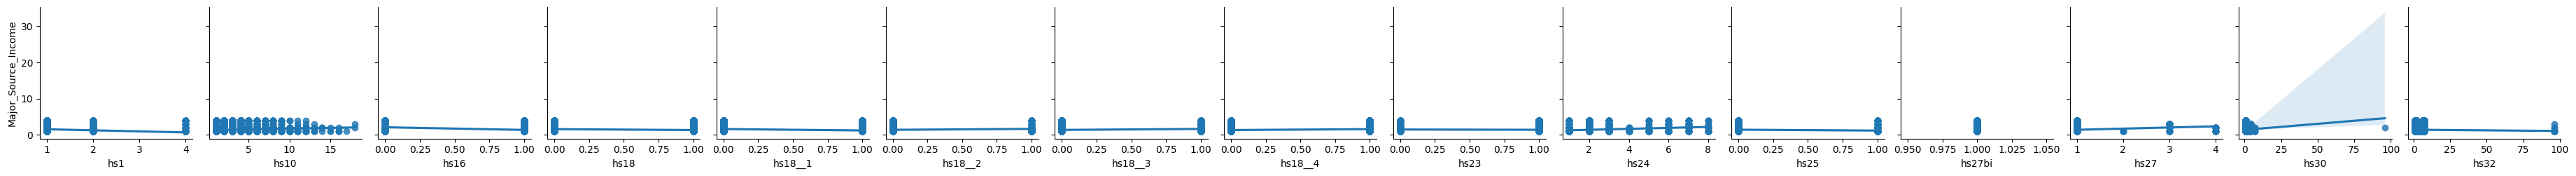

In [ ]:
#trying to take a look at the correlation between the features
sns.pairplot(merged_b7_b2, x_vars=['hs1', 'hs10', 'hs16','hs18', 'hs18__1', 'hs18__2', 'hs18__3', 'hs18__4',
           'hs23', 'hs24', 'hs25', 'hs27bi' ,'hs27', 'hs30', 'hs32'], y_vars=['Major_Source_Income'], kind='reg')

In [ ]:
merged_b7_b2[['hs1', 'hs10', 'hs16','hs18', 'hs18__1', 'hs18__2', 'hs18__3', 'hs18__4',
           'hs23', 'hs24', 'hs25', 'hs27bi' ,'hs27', 'hs30', 'hs32']].corrwith(merged_b7_b2['Major_Source_Income']).sort_values(ascending=False)

hs18__4    0.144845
hs24       0.141002
hs18__3    0.118799
hs10       0.095796
hs27       0.086827
hs18__2    0.065543
hs30       0.037089
hs32      -0.017390
hs23      -0.024553
hs25      -0.081093
hs18      -0.144845
hs16      -0.213957
hs18__1   -0.242931
hs1       -0.270415
hs27bi          NaN
dtype: float64

<ipython-input-85-61ff22a81a91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_b7_b2.corr()


Highly associated features: ['hs18__4', 'hs24', 'hs18__3', 'hs10', 'hs27']


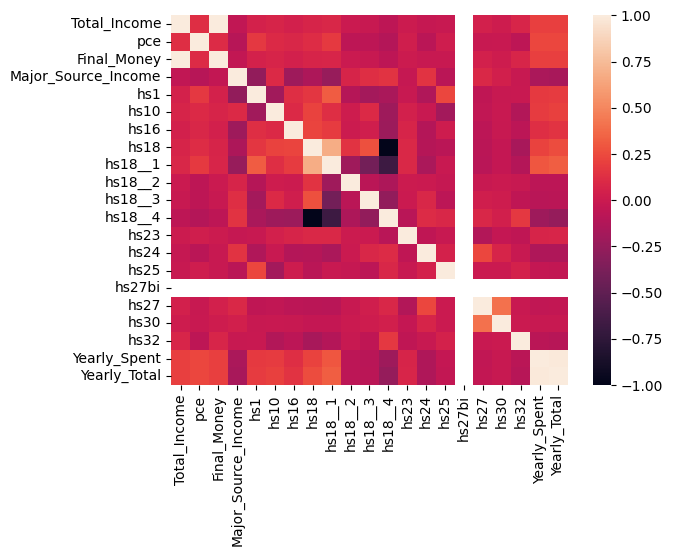

In [ ]:
corr_matrix = merged_b7_b2.corr()
sns.heatmap(corr_matrix)

highly_correlated_features = corr_matrix['Major_Source_Income'].sort_values(ascending=False)[1:6].index.tolist()
print('Highly associated features:', highly_correlated_features)

In [ ]:
#identifing the columns that are highly associated with the target 'Class':

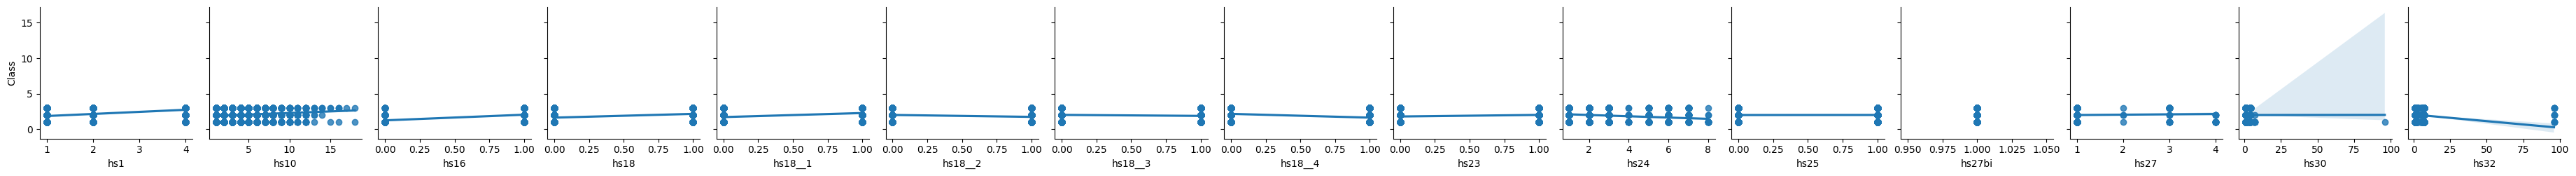

In [ ]:
#trying to take a look at the correlation between the features
sns.pairplot(merged_b7_b2, x_vars=['hs1', 'hs10', 'hs16','hs18', 'hs18__1', 'hs18__2', 'hs18__3', 'hs18__4',
           'hs23', 'hs24', 'hs25', 'hs27bi' ,'hs27', 'hs30', 'hs32'], y_vars=['Class'], kind='reg')

In [ ]:
merged_b7_b2[['hs1', 'hs10', 'hs16','hs18', 'hs18__1', 'hs18__2', 'hs18__3', 'hs18__4',
           'hs23', 'hs24', 'hs25', 'hs27bi' ,'hs27', 'hs30', 'hs32']].corrwith(merged_b7_b2['Class']).sort_values(ascending=False)

hs18__1    0.348133
hs18       0.299130
hs1        0.262675
hs16       0.223804
hs10       0.092432
hs23       0.070308
hs27       0.012904
hs25       0.003156
hs30       0.000212
hs18__3   -0.061350
hs18__2   -0.067543
hs32      -0.089669
hs24      -0.092671
hs18__4   -0.299130
hs27bi          NaN
dtype: float64

In [ ]:
#the columns that are highly associated with each other

In [ ]:
highly_correlated_features = corr_matrix['Major_Source_Income'].sort_values(ascending=False)[1:6].index.tolist()
print('Highly associated features:', highly_correlated_features)

Highly associated features: ['hs18__4', 'hs24', 'hs18__3', 'hs10', 'hs27']


In [ ]:
#columns that are highly associated with each other:
corr_matrix = merged_b7_b2.corr()

correlated_columns = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            correlated_columns.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print(correlated_columns)

[('Total_Income', 'Final_Money'), ('hs18', 'hs18__4'), ('Yearly_Spent', 'Yearly_Total')]


<ipython-input-91-64dd60b669ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_b7_b2.corr()


In [ ]:
#columns suitable to be the features to predict the target of 'Major_Source_Income' and 'Class':
#'hs18__4','hs24','hs18__3','hs10','hs27','Total_Income','Final_Money','hs18','Yearly_Spent','Yearly_Total'

<ipython-input-93-2a1b9f073fb1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b2['Total_Income'], bins=10)


Correlation between Total_Income and Final_Money: 0.9999373362982994


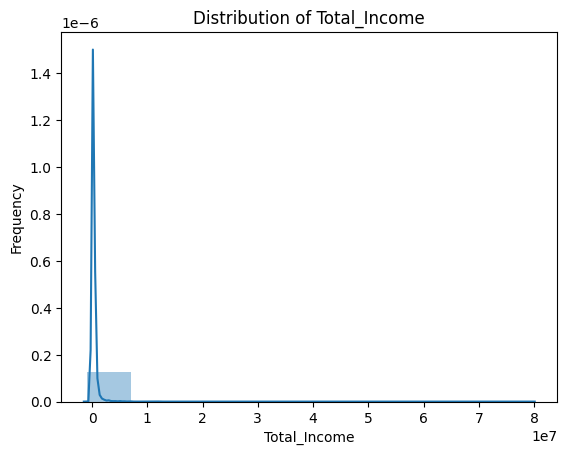

In [ ]:
#plotting distribution of Total_Income by Final_Money
sns.distplot(merged_b7_b2['Total_Income'], bins=10)
plt.xlabel('Total_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total_Income')

#calculating correlation between Total_Income and Final_Money
corr = merged_b7_b2['Total_Income'].corr(merged_b7_b2['Final_Money'])
print('Correlation between Total_Income and Final_Money:', corr)

The graphs above show high correlation between the feature and target for each pairing.


<ipython-input-94-6e0a0e9bff5c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b2['hs18'], bins=10)


Correlation between hs18 and hs18__4: -0.9999999999999999


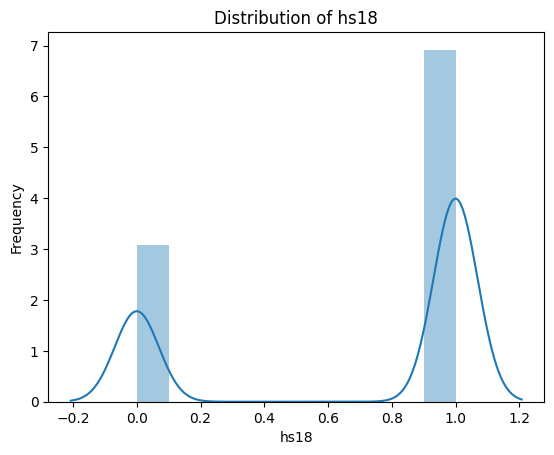

In [ ]:
#plotting distribution of hs18 by hs18__4
sns.distplot(merged_b7_b2['hs18'], bins=10)
plt.xlabel('hs18')
plt.ylabel('Frequency')
plt.title('Distribution of hs18')

#calculating correlation between hs18 and hs18__4
corr = merged_b7_b2['hs18'].corr(merged_b7_b2['hs18__4'])
print('Correlation between hs18 and hs18__4:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-95-827ea6046676>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b2['Yearly_Spent'], bins=10)


Correlation between Yearly_Spent and Yearly_Total: 0.9888198270911188


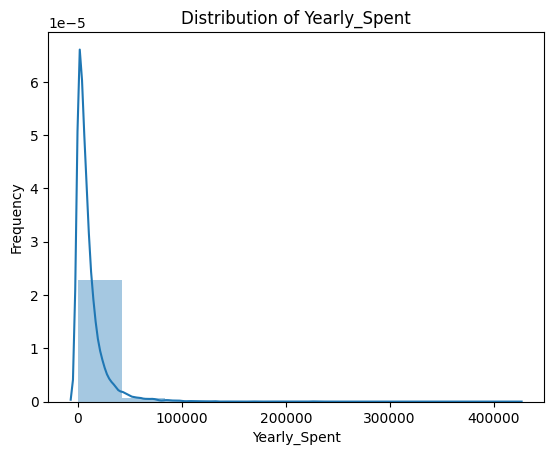

In [ ]:
#plotting distribution of Yearly_Spent by Yearly_Total
sns.distplot(merged_b7_b2['Yearly_Spent'], bins=10)
plt.xlabel('Yearly_Spent')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly_Spent')

#calculating correlation between Yearly_Spent and Yearly_Total
corr = merged_b7_b2['Yearly_Spent'].corr(merged_b7_b2['Yearly_Total'])
print('Correlation between Yearly_Spent and Yearly_Total:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-96-d0caf42433f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b2['Major_Source_Income'], bins=10)


Correlation between Major_Source_Income and hs18__4: 0.1448453210256527


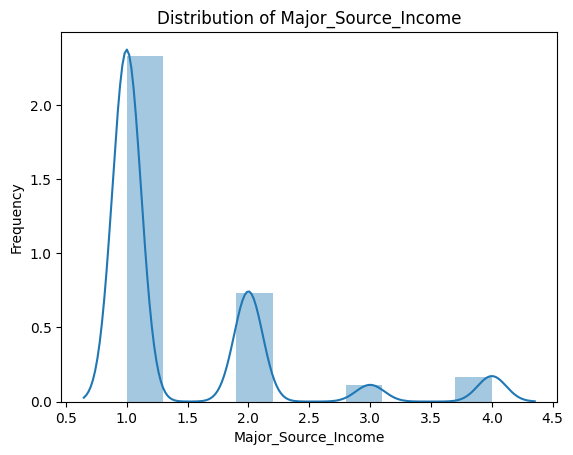

In [ ]:
#plotting distribution of Major_Source_Income by hs18__4
sns.distplot(merged_b7_b2['Major_Source_Income'], bins=10)
plt.xlabel('Major_Source_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Major_Source_Income')

#calculating correlation between Major_Source_Income and hs18__4
corr = merged_b7_b2['Major_Source_Income'].corr(merged_b7_b2['hs18__4'])
print('Correlation between Major_Source_Income and hs18__4:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-97-54bbfdf2b930>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b2['Major_Source_Income'], bins=10)


Correlation between Major_Source_Income and hs18__3: 0.11879924411736434


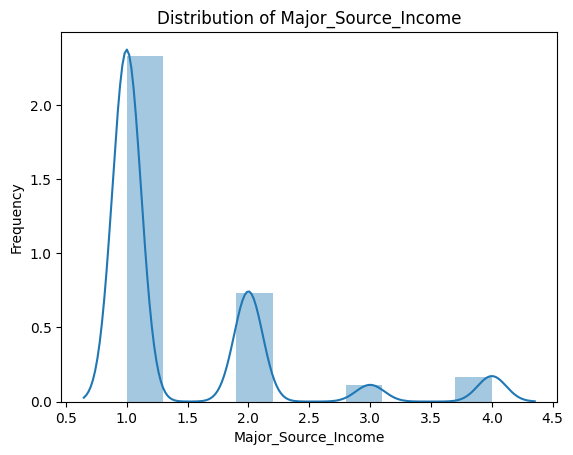

In [ ]:
#plotting distribution of Major_Source_Income by hs18__3
sns.distplot(merged_b7_b2['Major_Source_Income'], bins=10)
plt.xlabel('Major_Source_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Major_Source_Income')

#calculating correlation between Major_Source_Income and hs18__3
corr = merged_b7_b2['Major_Source_Income'].corr(merged_b7_b2['hs18__3'])
print('Correlation between Major_Source_Income and hs18__3:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-98-3de87876cb1c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b2['Yearly_Total'], bins=10)


Correlation between Yearly_Total and pce: 0.22803851473407835


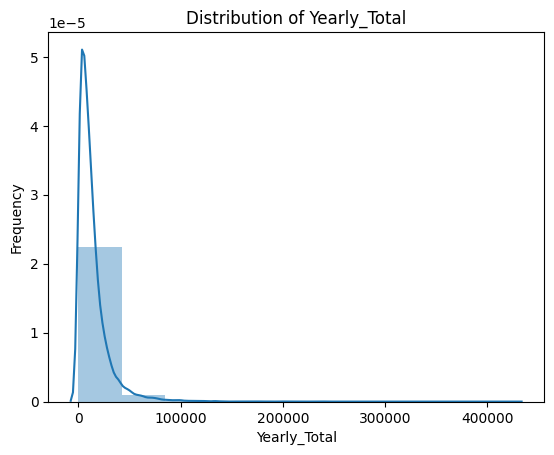

In [ ]:
# Plotting the distribution of Yearly_Total by pce
sns.distplot(merged_b7_b2['Yearly_Total'], bins=10)
plt.xlabel('Yearly_Total')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly_Total')

# Calculating the correlation between Yearly_Total and pce
corr = merged_b7_b2['Yearly_Total'].corr(merged_b7_b2['pce'])
print('Correlation between Yearly_Total and pce:', corr)

The graphs above show high correlation between the feature and target for each pairing.



<ipython-input-99-fe6fb4bc1cf3>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["FLUSH TO PIPED SEWER SYSTEM","FLUSH TO SEPTIC TANK","FLUSH TO PIT LATRINE","FLUSH TO OPEN DRAIN/OPEN SPACE","VENTILATED IMPROVE PIT","] PIT LATRINE WITH SLAB","PIT LATRINE WITHOUT SLAB","NO FACILITY/BUSH/FIELD","Other"],rotation=90)


<Axes: xlabel='Yearly_Total', ylabel='Final_Money'>

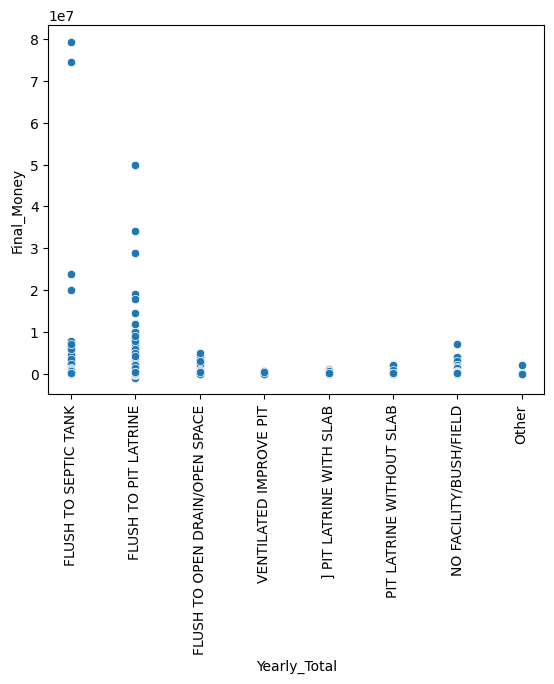

In [ ]:
#Type of toilet
plt.xlabel('Yearly_Total')
plt.gca().set_xticklabels(["FLUSH TO PIPED SEWER SYSTEM","FLUSH TO SEPTIC TANK","FLUSH TO PIT LATRINE","FLUSH TO OPEN DRAIN/OPEN SPACE","VENTILATED IMPROVE PIT","] PIT LATRINE WITH SLAB","PIT LATRINE WITHOUT SLAB","NO FACILITY/BUSH/FIELD","Other"],rotation=90)
sns.scatterplot(data=merged_b7_b2, x="hs24", y="Final_Money")

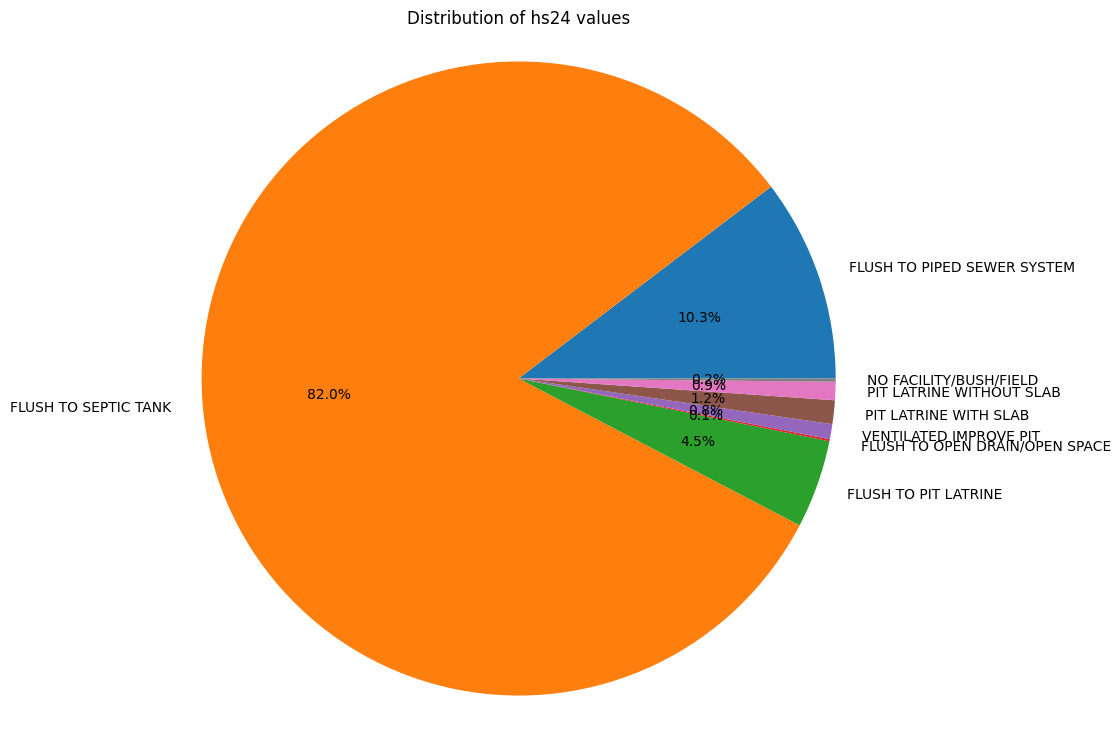

In [ ]:
# Grouping and aggregating the data
grouped_data = merged_b7_b2.groupby("hs24").size()

# Getting unique values and their counts
labels = ["FLUSH TO PIPED SEWER SYSTEM","FLUSH TO SEPTIC TANK","FLUSH TO PIT LATRINE","FLUSH TO OPEN DRAIN/OPEN SPACE","VENTILATED IMPROVE PIT","PIT LATRINE WITH SLAB","PIT LATRINE WITHOUT SLAB","NO FACILITY/BUSH/FIELD"]
counts = grouped_data.tolist()

# Creating the pie chart
plt.figure(figsize=(9, 9))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of hs24 values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<ipython-input-101-a1c5ac8aac2a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["0","ELECTRICITY","KEROSENE","FIREWOOD","SOLAR","GENERATOR","CANDLE","Other"],rotation=90)


(0.0, 7.0)

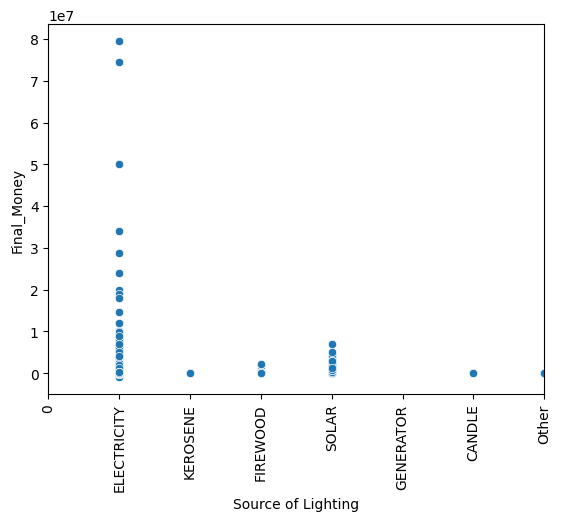

In [ ]:
#Main Source of Lighting
plt.xlabel('Source of Lighting')
plt.gca().set_xticklabels(["0","ELECTRICITY","KEROSENE","FIREWOOD","SOLAR","GENERATOR","CANDLE","Other"],rotation=90)
sns.scatterplot(data=merged_b7_b2, x="hs30", y="Final_Money")
plt.xlim(0, 7)

<ipython-input-102-5688843df007>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["0","GAS (LPG)","ELECTRICITY","WOOD","COAL","KEROSENE","DUNG CAKE","BIO‐GAS"],rotation=90)


(0.0, 8.0)

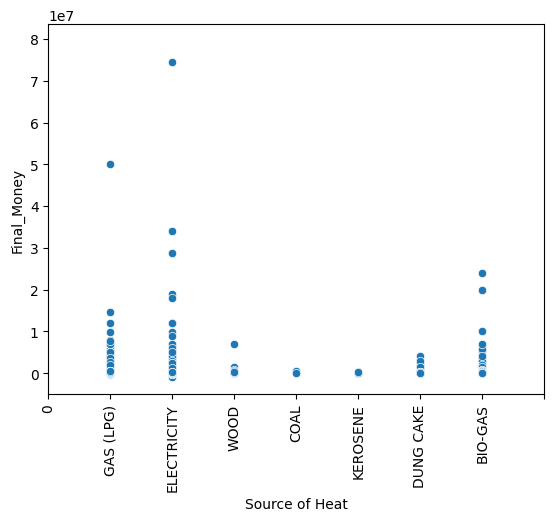

In [ ]:
#Heating of dwelling
plt.xlabel('Source of Heat')
plt.gca().set_xticklabels(["0","GAS (LPG)","ELECTRICITY","WOOD","COAL","KEROSENE","DUNG CAKE","BIO‐GAS"],rotation=90)
sns.scatterplot(data=merged_b7_b2, x="hs32", y="Final_Money")
plt.xlim(0, 8)

In [ ]:
unique_values_count = merged_b7_b2["hs32"].nunique()
print("Number of unique values in hs32 column:", unique_values_count)
print("Number of data points in hs32 column:", len(merged_b7_b2["hs32"]))

Number of unique values in hs32 column: 8
Number of data points in hs32 column: 13335


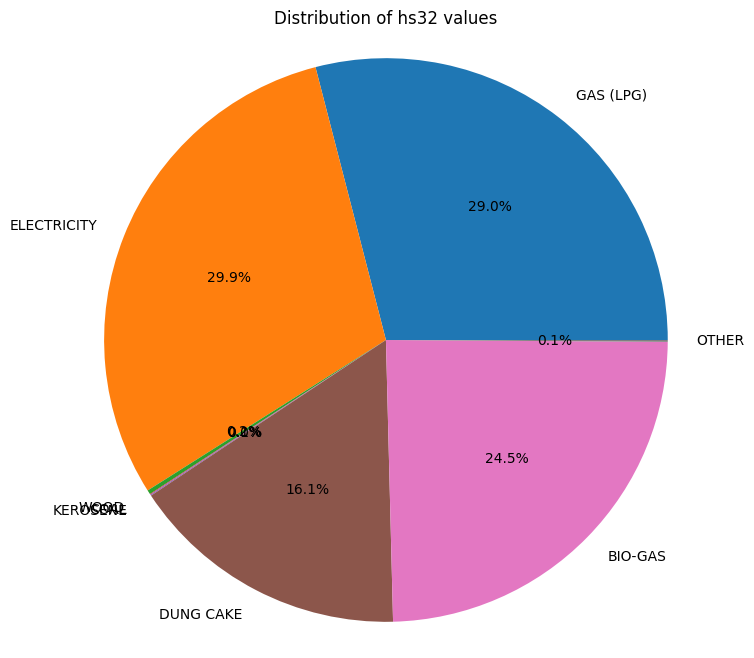

In [ ]:
# Grouping and aggregating the data
grouped_data = merged_b7_b2.groupby("hs32").size()

# Getting unique values and their counts
labels = ["GAS (LPG)","ELECTRICITY","WOOD","COAL","KEROSENE","DUNG CAKE","BIO‐GAS","OTHER"]
counts = grouped_data.tolist()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of hs32 values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
##Question 2
merged_b7_b13 = pd.merge(b7,b13, on='interview__id', how='inner')

In [ ]:
b7.merge(b13, on='interview__id', how='inner')

,interview__id,Total_Income,pce,Final_Money,Major_Source_Income,Class,age,h1,h2,h5_no_need,h5_other_reason,Total_Outpatient_Expenses,Total_Inpatient_Expenses
0,000233e6e354484585c1f2d243b10497,70000.0,12131.1010,57868.8990,1,1,14,0,0.0,0.0,0.0,0.0,0.0
1,000233e6e354484585c1f2d243b10497,70000.0,12131.1010,57868.8990,1,1,17,0,0.0,0.0,0.0,0.0,0.0
2,000233e6e354484585c1f2d243b10497,70000.0,12131.1010,57868.8990,1,1,53,0,0.0,0.0,0.0,0.0,0.0
3,000233e6e354484585c1f2d243b10497,70000.0,12131.1010,57868.8990,1,1,48,1,1.0,0.0,0.0,8400.0,0.0
4,0005370124c340668360a4798a9af2a6,71000.0,8591.5430,62408.4570,1,1,56,1,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52800,fffa39c7175a4b88a0fc63a47ca2bd64,50000.0,4132.1753,45867.8247,2,1,48,1,1.0,0.0,0.0,0.0,6000.0
52801,fffa6dc829d84522ae5afcfd81c75e45,288000.0,14981.3750,273018.6250,1,2,13,0,0.0,0.0,0.0,0.0,0.0
52802,fffa6dc829d84522ae5afcfd81c75e45,288000.0,14981.3750,273018.6250,1,2,42,0,0.0,0.0,0.0,0.0,0.0
52803,fffa6dc829d84522ae5afcfd81c75e45,288000.0,14981.3750,273018.6250,1,2,17,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#identifing the columns that are highly associated with the target 'Major_Source_Income':

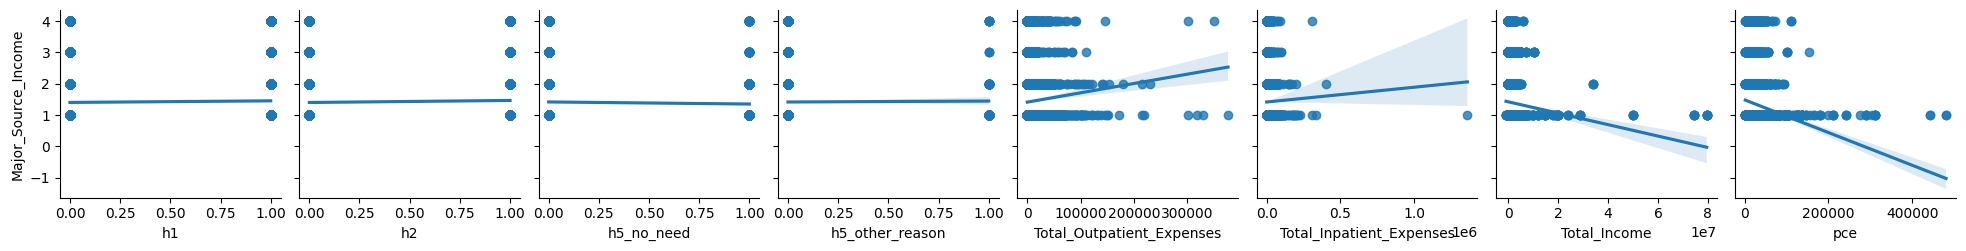

In [ ]:
#trying to take a look at the correlation between the features
sns.pairplot(merged_b7_b13, x_vars=['h1', 'h2', 'h5_no_need', 'h5_other_reason','Total_Outpatient_Expenses',
                                    'Total_Inpatient_Expenses', 'Total_Income', 'pce'], y_vars=['Major_Source_Income'], kind='reg')

In [ ]:
merged_b7_b13[['h1', 'h2', 'h5_no_need', 'h5_other_reason','Total_Outpatient_Expenses',
              'Total_Inpatient_Expenses', 'Total_Income', 'pce']].corrwith(merged_b7_b13['Major_Source_Income']).sort_values(ascending=False)

h2                           0.037758
h1                           0.030801
Total_Outpatient_Expenses    0.029563
Total_Inpatient_Expenses     0.005697
h5_other_reason              0.002269
h5_no_need                  -0.015082
Total_Income                -0.036816
pce                         -0.081646
dtype: float64

<ipython-input-110-ccc74fbc21ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_b7_b13.corr()


Highly associated features: ['age', 'h2', 'h1', 'Total_Outpatient_Expenses', 'Total_Inpatient_Expenses']


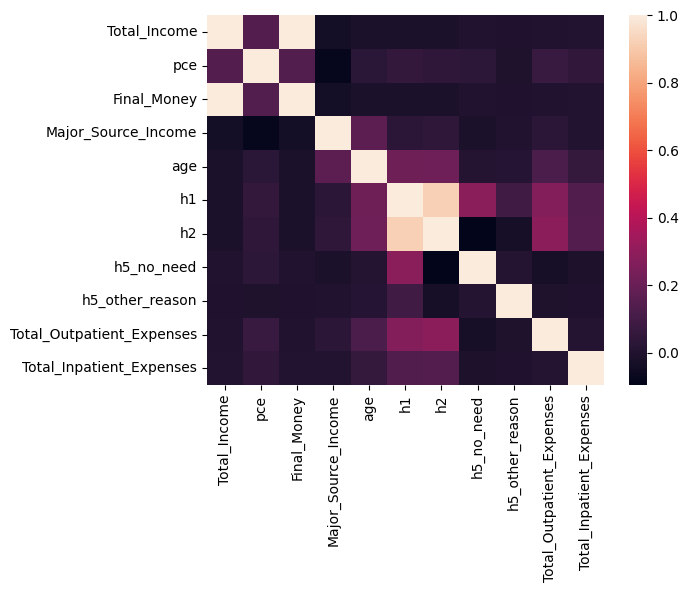

In [ ]:
corr_matrix = merged_b7_b13.corr()
sns.heatmap(corr_matrix)

highly_correlated_features = corr_matrix['Major_Source_Income'].sort_values(ascending=False)[1:6].index.tolist()
print('Highly associated features:', highly_correlated_features)

In [ ]:
#identifing the columns that are highly associated with the target 'Class':

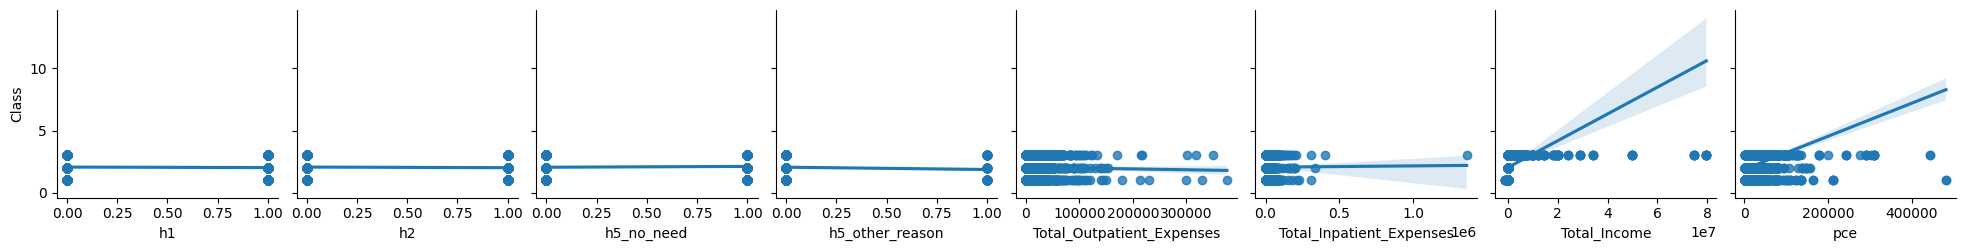

In [ ]:
#trying to take a look at the correlation between the features
sns.pairplot(merged_b7_b13, x_vars=['h1', 'h2', 'h5_no_need', 'h5_other_reason','Total_Outpatient_Expenses',
                                    'Total_Inpatient_Expenses', 'Total_Income', 'pce'], y_vars=['Class'], kind='reg')

In [ ]:
merged_b7_b13[['h1', 'h2', 'h5_no_need', 'h5_other_reason','Total_Outpatient_Expenses',
              'Total_Inpatient_Expenses', 'Total_Income', 'pce']].corrwith(merged_b7_b13['Class']).sort_values(ascending=False)

Total_Income                 0.197656
pce                          0.189165
h5_no_need                   0.013501
Total_Inpatient_Expenses     0.001158
Total_Outpatient_Expenses   -0.006186
h5_other_reason             -0.012684
h1                          -0.021647
h2                          -0.026362
dtype: float64

In [ ]:
#the columns that are highly associated with each other

In [ ]:
highly_correlated_features = corr_matrix['Major_Source_Income'].sort_values(ascending=False)[1:6].index.tolist()
print('Highly associated features:', highly_correlated_features)

Highly associated features: ['age', 'h2', 'h1', 'Total_Outpatient_Expenses', 'Total_Inpatient_Expenses']


In [ ]:
#columns that are highly associated with each other:
corr_matrix = merged_b7_b13.corr()

correlated_columns = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            correlated_columns.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print(correlated_columns)

[('Total_Income', 'Final_Money'), ('h1', 'h2')]


<ipython-input-116-78493418e266>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_b7_b13.corr()


In [ ]:
#columns suitable to be the features to predict the target of 'Major_Source_Income' and 'Class':
#'h2', 'h1', 'Total_Outpatient_Expenses', 'Total_Inpatient_Expenses', 'Total_Income', 'Final_Money'

<ipython-input-118-9483b3176f23>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b13['Total_Income'], bins=10)


Correlation between Total_Income and Final_Money: 0.9999704479139829


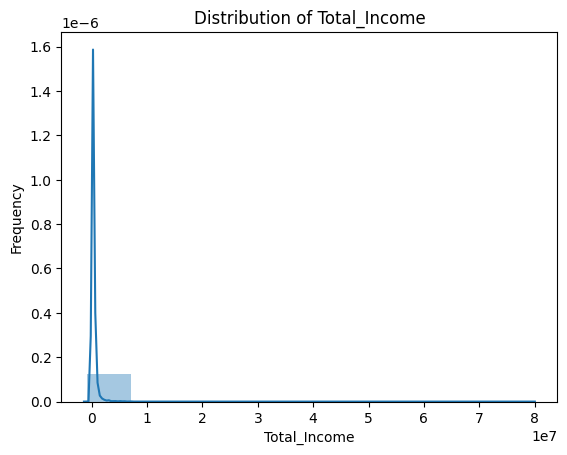

In [ ]:
#plotting distribution of Total_Income by Final_Money
sns.distplot(merged_b7_b13['Total_Income'], bins=10)
plt.xlabel('Total_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total_Income')

#calculating correlation between Total_Income and Final_Money
corr = merged_b7_b13['Total_Income'].corr(merged_b7_b13['Final_Money'])
print('Correlation between Total_Income and Final_Money:', corr)

The graphs above show high correlation between the feature and target for each pairing.


<ipython-input-119-0611bd181123>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b13['h1'], bins=10)


Correlation between h1 and h2: 0.9203415383817221


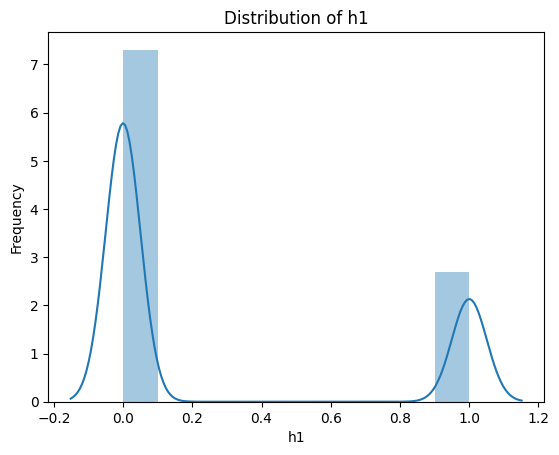

In [ ]:
#plotting distribution of h1 by h2
sns.distplot(merged_b7_b13['h1'], bins=10)
plt.xlabel('h1')
plt.ylabel('Frequency')
plt.title('Distribution of h1')

#calculating correlation between h1 and h2
corr = merged_b7_b13['h1'].corr(merged_b7_b13['h2'])
print('Correlation between h1 and h2:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-120-5dea0778af6b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b13['Major_Source_Income'], bins=10)


Correlation between Major_Source_Income and h2: 0.03775848684387955


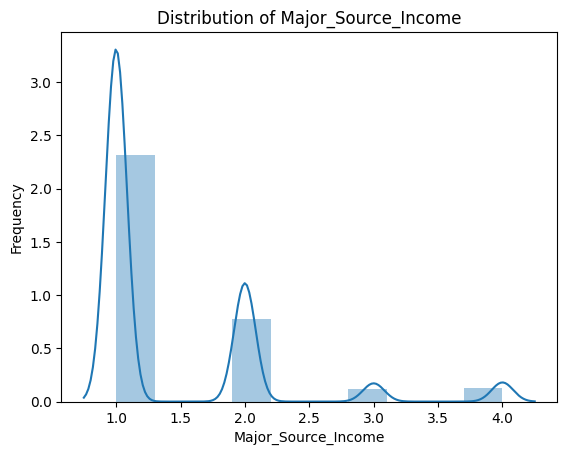

In [ ]:
#plotting distribution of Major_Source_Income by h2
sns.distplot(merged_b7_b13['Major_Source_Income'], bins=10)
plt.xlabel('Major_Source_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Major_Source_Income')

#calculating correlation between Major_Source_Income and h2
corr = merged_b7_b13['Major_Source_Income'].corr(merged_b7_b13['h2'])
print('Correlation between Major_Source_Income and h2:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-121-7b0ed742bce8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b13['Major_Source_Income'], bins=10)


Correlation between Major_Source_Income and h1: 0.030800662669579707


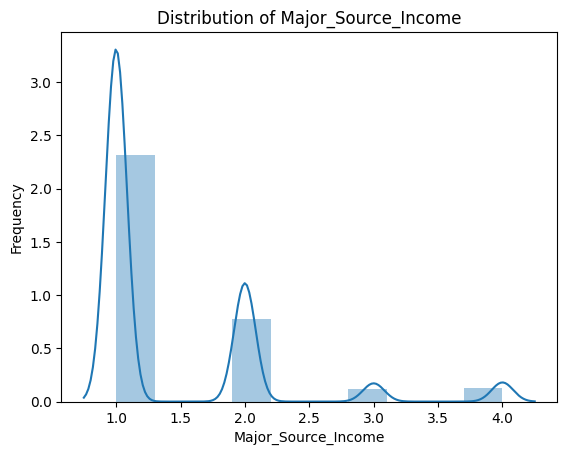

In [ ]:
#plotting distribution of Major_Source_Income by h1
sns.distplot(merged_b7_b13['Major_Source_Income'], bins=10)
plt.xlabel('Major_Source_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Major_Source_Income')

#calculating correlation between Major_Source_Income and h1
corr = merged_b7_b13['Major_Source_Income'].corr(merged_b7_b13['h1'])
print('Correlation between Major_Source_Income and h1:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-122-2b637384dd0e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b13['Major_Source_Income'], bins=10)


Correlation between Major_Source_Income and Total_Outpatient_Expenses: 0.029562891399998785


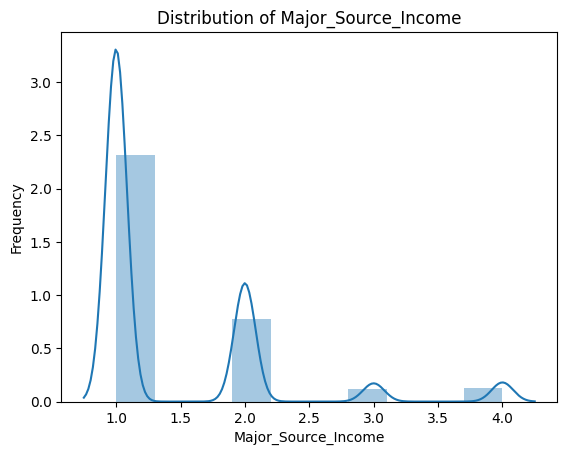

In [ ]:
#plotting distribution of Major_Source_Income by Total_Outpatient_Expenses
sns.distplot(merged_b7_b13['Major_Source_Income'], bins=10)
plt.xlabel('Major_Source_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Major_Source_Income')

#calculating correlation between Major_Source_Income and Total_Outpatient_Expenses
corr = merged_b7_b13['Major_Source_Income'].corr(merged_b7_b13['Total_Outpatient_Expenses'])
print('Correlation between Major_Source_Income and Total_Outpatient_Expenses:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-123-7e466a3e132d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b13['Major_Source_Income'], bins=10)


Correlation between Major_Source_Income and Total_Inpatient_Expenses: 0.005697292978431403


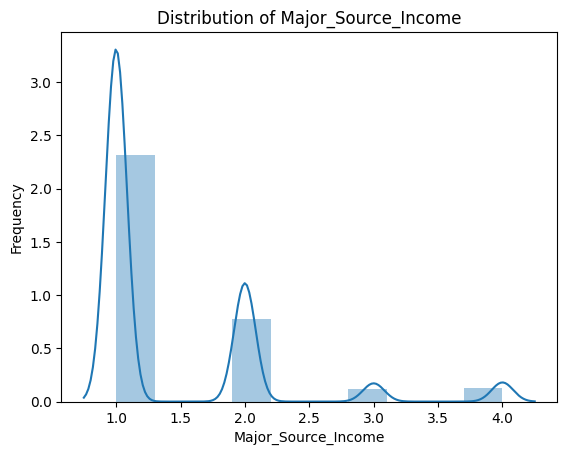

In [ ]:
#plotting distribution of Major_Source_Income by Total_Inpatient_Expenses
sns.distplot(merged_b7_b13['Major_Source_Income'], bins=10)
plt.xlabel('Major_Source_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Major_Source_Income')

#calculating correlation between Major_Source_Income and Total_Inpatient_Expenses
corr = merged_b7_b13['Major_Source_Income'].corr(merged_b7_b13['Total_Inpatient_Expenses'])
print('Correlation between Major_Source_Income and Total_Inpatient_Expenses:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-124-8aaa542f83b6>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["0","no","","","","","yes"])


<Axes: xlabel='Suffered from sickness or injury', ylabel='Final_Money'>

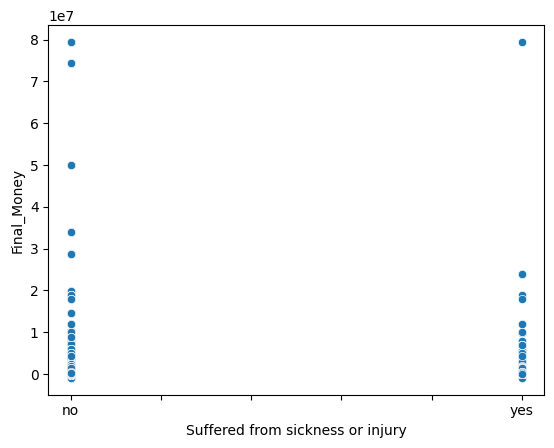

In [ ]:
plt.xlabel('Suffered from sickness or injury')
plt.gca().set_xticklabels(["0","no","","","","","yes"])
sns.scatterplot(data=merged_b7_b13, x="h1", y="Final_Money")

<ipython-input-125-6410c8b765a3>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["no","yes"])


<Axes: xlabel='Suffered from sickness or injury', ylabel='count'>

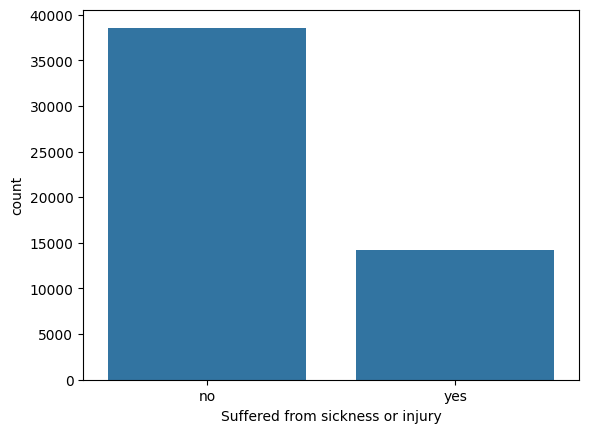

In [ ]:
plt.xlabel('Suffered from sickness or injury')
plt.gca().set_xticklabels(["no","yes"])
sns.countplot(data=merged_b7_b13, x="h1")

(0.0, 400000.0)

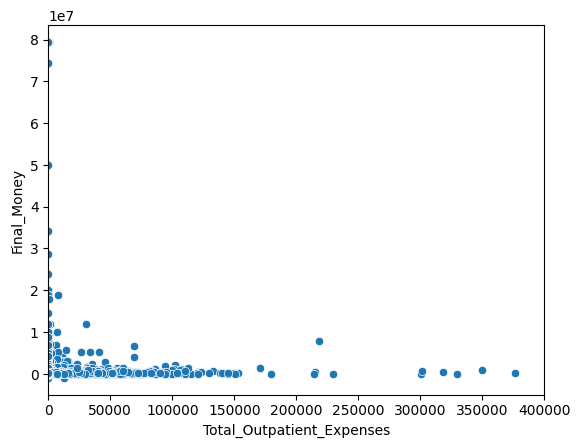

In [ ]:
sns.scatterplot(data=merged_b7_b13, x="Total_Outpatient_Expenses", y="Final_Money")
plt.xlim(0,.4*1e6)

(0.0, 400000.0)

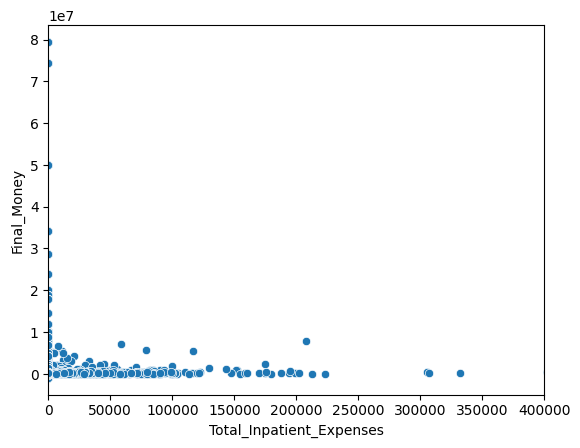

In [ ]:
sns.scatterplot(data=merged_b7_b13, x="Total_Inpatient_Expenses", y="Final_Money")
plt.xlim(0,.4*1e6)

In [ ]:
#Question 3
merged_b7_b3 = b7.merge(b3, on='interview__id', how='inner')

In [ ]:
merged_b7_b3['pce_minus_tsLL'] = b7['pce'] - b3['Total_Spent_LL']
merged_b7_b3

,interview__id,Total_Income,pce,Final_Money,Major_Source_Income,Class,Total_Livestock,Total_Spent_On_Livestock,Total_Wet_Land_Used,Total_Dry_Land_Used,Total_Orchard_Land_Used,Total_Land_Used,Total_Spent_On_Land,Total_Spent_LL,pce_minus_tsLL
0,000233e6e354484585c1f2d243b10497,70000.0,12131.1010,57868.8990,1,1,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,12131.1010
1,0005370124c340668360a4798a9af2a6,71000.0,8591.5430,62408.4570,1,1,1.0,0.0,0.08,1.00,0.05,1.13,0.0,0.0,8591.5430
2,000ec14737034fc4a01e8b8b29b92879,180000.0,8308.9140,171691.0860,1,2,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,8308.9140
3,001f7295371148b9812b6325e435c27d,200000.0,6540.3354,193459.6646,1,2,0.0,0.0,0.50,0.00,0.00,0.50,0.0,0.0,6540.3354
4,00201fed04ed4c83b851e5dd95a53edf,370500.0,6386.7124,364113.2876,2,3,17.0,0.0,0.00,2.98,0.00,2.98,0.0,0.0,6386.7124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,fff23c55a920401fad3f1e17720af2da,18900.0,6444.3780,12455.6220,2,1,24.0,0.0,0.00,1.00,0.00,1.00,0.0,0.0,6444.3780
13331,fff721cca8e14f3693b58b20ed8a153e,50000.0,10149.8660,39850.1340,2,1,6.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,10149.8660
13332,fff7f8ea5cad47a1893222c168b1386a,198000.0,5306.1460,192693.8540,1,2,27.0,0.0,0.00,2.60,0.00,2.60,0.0,0.0,5306.1460
13333,fffa39c7175a4b88a0fc63a47ca2bd64,50000.0,4132.1753,45867.8247,2,1,7.0,0.0,0.00,0.66,0.00,0.66,0.0,0.0,4132.1753


In [ ]:
#identifing the columns that are highly associated with the target 'pce_minus_tsLL':

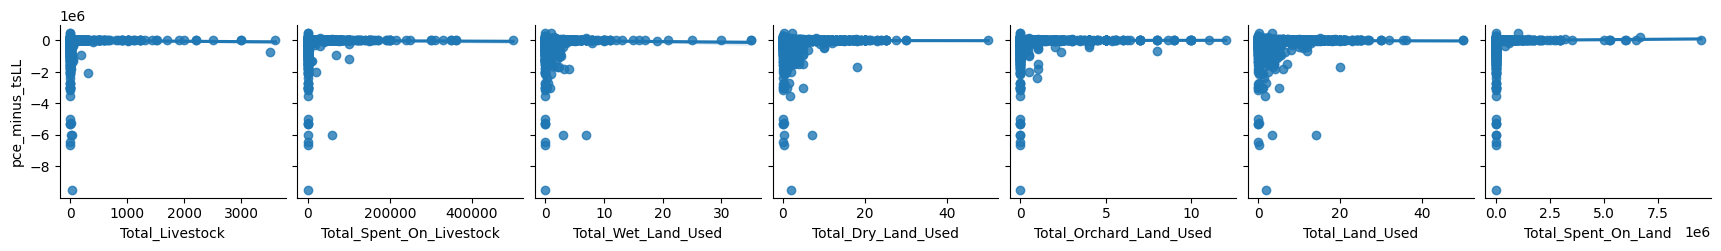

In [ ]:
#trying to take a look at the correlation between the features
sns.pairplot(merged_b7_b3, x_vars=['Total_Livestock','Total_Spent_On_Livestock', 'Total_Wet_Land_Used', 'Total_Dry_Land_Used',
'Total_Orchard_Land_Used', 'Total_Land_Used', 'Total_Spent_On_Land'], y_vars=['pce_minus_tsLL'], kind='reg')

In [ ]:
merged_b7_b3[['Total_Livestock','Total_Spent_On_Livestock', 'Total_Wet_Land_Used', 'Total_Dry_Land_Used',
'Total_Orchard_Land_Used', 'Total_Land_Used', 'Total_Spent_On_Land']].corrwith(merged_b7_b3['pce_minus_tsLL']).sort_values(ascending=False)

Total_Spent_On_Land         0.010462
Total_Orchard_Land_Used     0.003014
Total_Dry_Land_Used        -0.002783
Total_Spent_On_Livestock   -0.007187
Total_Land_Used            -0.008168
Total_Livestock            -0.010591
Total_Wet_Land_Used        -0.017962
dtype: float64

<ipython-input-133-4864fb727c7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_b7_b3.corr()


Highly associated features: ['pce', 'Total_Spent_On_Land', 'Total_Spent_LL', 'Total_Income', 'Final_Money']


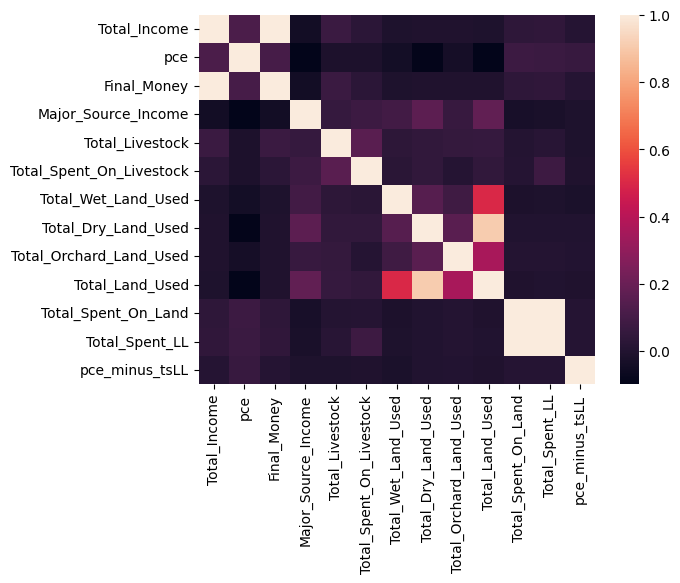

In [ ]:
corr_matrix = merged_b7_b3.corr()
sns.heatmap(corr_matrix)

highly_correlated_features = corr_matrix['pce_minus_tsLL'].sort_values(ascending=False)[1:6].index.tolist()
print('Highly associated features:', highly_correlated_features)

In [ ]:
#identifing the columns that are highly associated with the target 'pce':

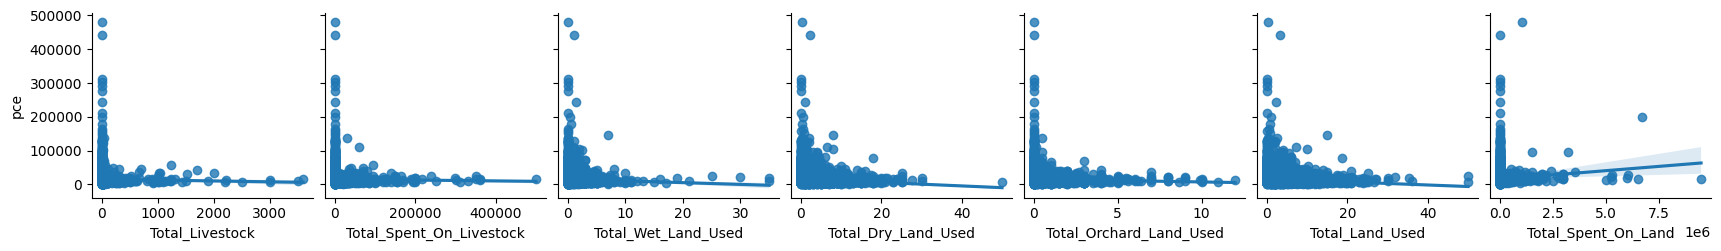

In [ ]:
#trying to take a look at the correlation between the features
sns.pairplot(merged_b7_b3, x_vars=['Total_Livestock','Total_Spent_On_Livestock', 'Total_Wet_Land_Used', 'Total_Dry_Land_Used',
'Total_Orchard_Land_Used', 'Total_Land_Used', 'Total_Spent_On_Land'], y_vars=['pce'], kind='reg')

In [ ]:
merged_b7_b3[['Total_Livestock','Total_Spent_On_Livestock', 'Total_Wet_Land_Used', 'Total_Dry_Land_Used',
'Total_Orchard_Land_Used', 'Total_Land_Used', 'Total_Spent_On_Land']].corrwith(merged_b7_b3['pce']).sort_values(ascending=False)

Total_Spent_On_Land         0.073341
Total_Spent_On_Livestock   -0.013006
Total_Livestock            -0.016810
Total_Orchard_Land_Used    -0.035029
Total_Wet_Land_Used        -0.039852
Total_Dry_Land_Used        -0.090401
Total_Land_Used            -0.095884
dtype: float64

<ipython-input-137-a7c7fc7e71f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_b7_b3.corr()


Highly associated features: ['Total_Income', 'Final_Money', 'Total_Spent_On_Land', 'Total_Spent_LL', 'pce_minus_tsLL']


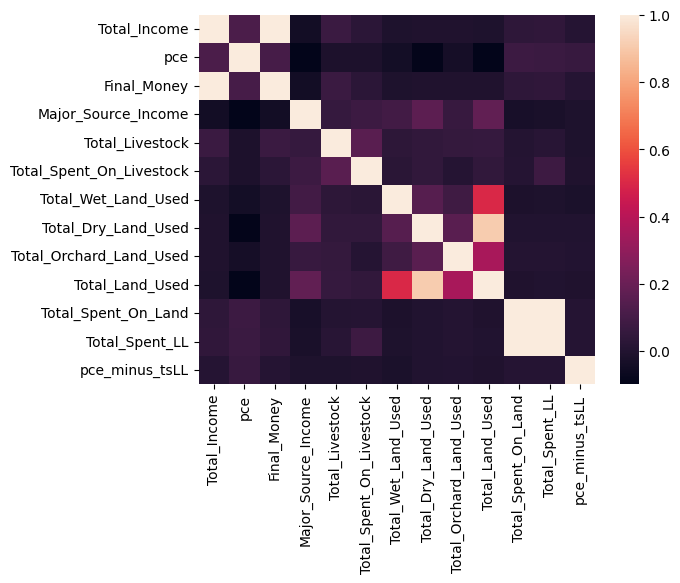

In [ ]:
corr_matrix = merged_b7_b3.corr()
sns.heatmap(corr_matrix)

highly_correlated_features = corr_matrix['pce'].sort_values(ascending=False)[1:6].index.tolist()
print('Highly associated features:', highly_correlated_features)

In [ ]:
#the columns that are highly associated with each other:

In [ ]:
highly_correlated_features = corr_matrix['pce_minus_tsLL'].sort_values(ascending=False)[1:6].index.tolist()
print('Highly associated features:', highly_correlated_features)

Highly associated features: ['pce', 'Total_Spent_On_Land', 'Total_Spent_LL', 'Total_Income', 'Final_Money']


In [ ]:
highly_correlated_features = corr_matrix['pce'].sort_values(ascending=False)[1:6].index.tolist()
print('Highly associated features:', highly_correlated_features)

Highly associated features: ['Total_Income', 'Final_Money', 'Total_Spent_On_Land', 'Total_Spent_LL', 'pce_minus_tsLL']


In [ ]:
#columns that are highly associated with each other:
corr_matrix = merged_b7_b3.corr()

correlated_columns = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            correlated_columns.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print(correlated_columns)

[('Total_Income', 'Final_Money'), ('Total_Dry_Land_Used', 'Total_Land_Used'), ('Total_Spent_On_Land', 'Total_Spent_LL')]


<ipython-input-141-ff2998b7927d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_b7_b3.corr()


In [ ]:
#columns suitable to be the features to predict the target of 'Major_Source_Income' and 'Class':
#'Total_Spent_On_Land', 'Total_Spent_LL', 'Total_Income', 'Final_Money', 'Total_Dry_Land_Used', 'Total_Land_Used'

<ipython-input-143-c99c3941e16c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b3['Total_Income'], bins=10)


Correlation between Total_Income and Final_Money: 0.9999373362982994


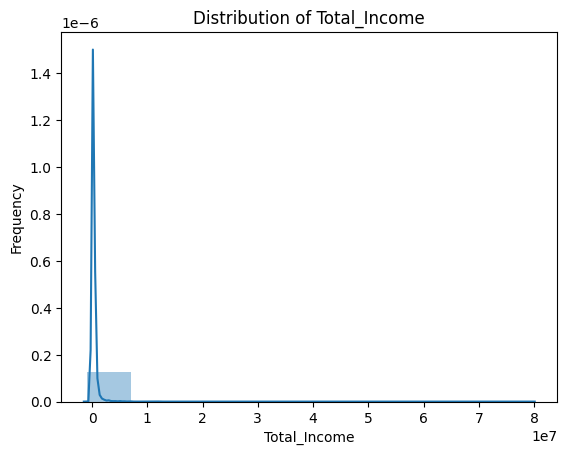

In [ ]:
#plotting distribution of Total_Income by Final_Money
sns.distplot(merged_b7_b3['Total_Income'], bins=10)
plt.xlabel('Total_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total_Income')

#calculating correlation between Total_Income and Final_Money
corr = merged_b7_b3['Total_Income'].corr(merged_b7_b3['Final_Money'])
print('Correlation between Total_Income and Final_Money:', corr)

The graphs above show high correlation between the feature and target for each pairing.


<ipython-input-144-39c55b14d923>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b3['Total_Dry_Land_Used'], bins=10)


Correlation between Total_Dry_Land_Used and Total_Land_Used: 0.908590367731952


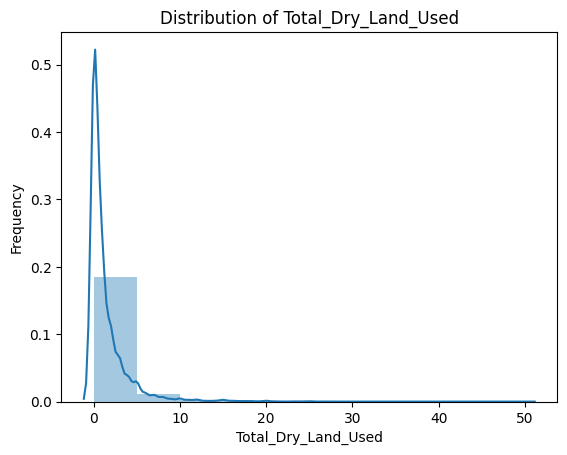

In [ ]:
#plotting distribution of Total_Dry_Land_Used by Total_Land_Used
sns.distplot(merged_b7_b3['Total_Dry_Land_Used'], bins=10)
plt.xlabel('Total_Dry_Land_Used')
plt.ylabel('Frequency')
plt.title('Distribution of Total_Dry_Land_Used')

#calculating correlation between Total_Dry_Land_Used and Total_Land_Used
corr = merged_b7_b3['Total_Dry_Land_Used'].corr(merged_b7_b3['Total_Land_Used'])
print('Correlation between Total_Dry_Land_Used and Total_Land_Used:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-145-93f9d8f828e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b3['Total_Spent_On_Land'], bins=10)


Correlation between Total_Spent_On_Land and Total_Spent_LL: 0.997591170344154


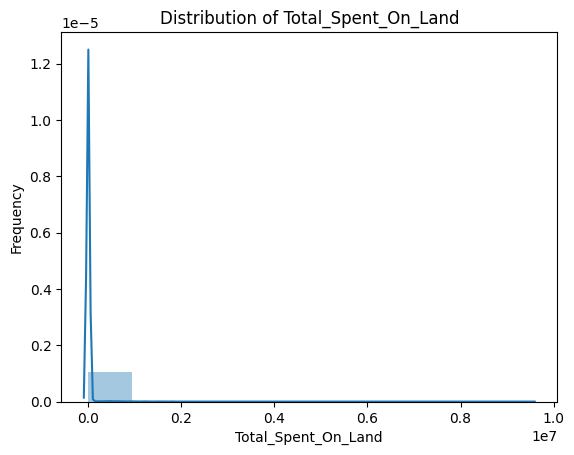

In [ ]:
#plotting distribution of Total_Spent_On_Land by Total_Spent_LL
sns.distplot(merged_b7_b3['Total_Spent_On_Land'], bins=10)
plt.xlabel('Total_Spent_On_Land')
plt.ylabel('Frequency')
plt.title('Distribution of Total_Spent_On_Land')

#calculating correlation between Total_Spent_On_Land and Total_Spent_LL
corr = merged_b7_b3['Total_Spent_On_Land'].corr(merged_b7_b3['Total_Spent_LL'])
print('Correlation between Total_Spent_On_Land and Total_Spent_LL:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-146-b62a5cc7c9c3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b3['pce_minus_tsLL'], bins=10)


Correlation between pce_minus_tsLL and pce: 0.06365894989860067


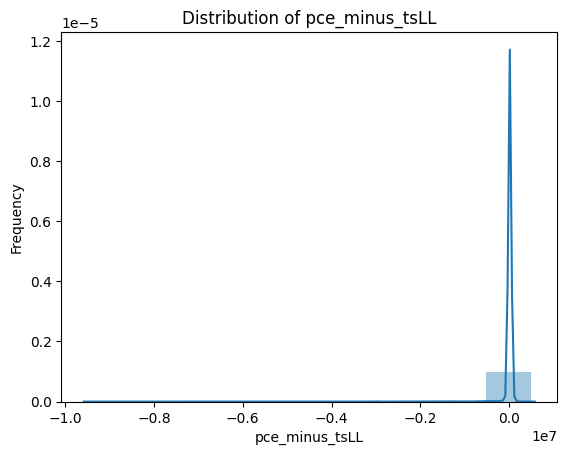

In [ ]:
#plotting distribution of pce_minus_tsLL by pce
sns.distplot(merged_b7_b3['pce_minus_tsLL'], bins=10)
plt.xlabel('pce_minus_tsLL')
plt.ylabel('Frequency')
plt.title('Distribution of pce_minus_tsLL')

#calculating correlation between pce_minus_tsLL and pce
corr = merged_b7_b3['pce_minus_tsLL'].corr(merged_b7_b3['pce'])
print('Correlation between pce_minus_tsLL and pce:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-147-f9285d518a2a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b3['pce_minus_tsLL'], bins=10)


Correlation between pce_minus_tsLL and Final_Money: 0.009044982560897644


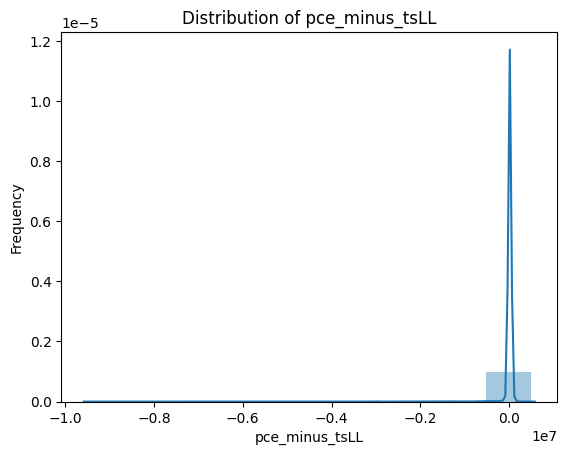

In [ ]:
#plotting distribution of pce_minus_tsLL by Final_Money
sns.distplot(merged_b7_b3['pce_minus_tsLL'], bins=10)
plt.xlabel('pce_minus_tsLL')
plt.ylabel('Frequency')
plt.title('Distribution of pce_minus_tsLL')

#calculating correlation between pce_minus_tsLL and Final_Money
corr = merged_b7_b3['pce_minus_tsLL'].corr(merged_b7_b3['Final_Money'])
print('Correlation between pce_minus_tsLL and Final_Money:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-148-1f2accdeecbd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b3['pce'], bins=10)


Correlation between pce and Total_Income: 0.11784222264809471


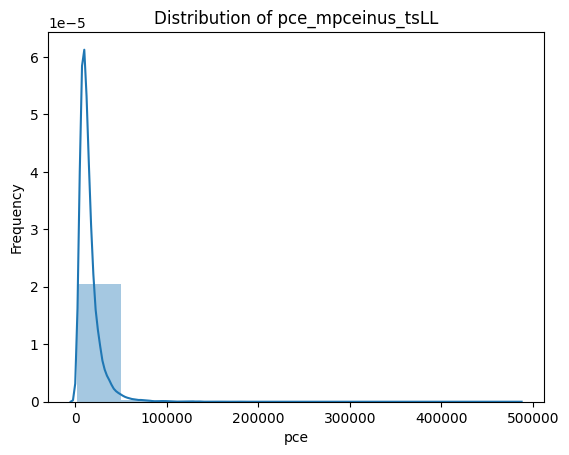

In [ ]:
#plotting distribution of pce by Total_Income
sns.distplot(merged_b7_b3['pce'], bins=10)
plt.xlabel('pce')
plt.ylabel('Frequency')
plt.title('Distribution of pce_mpceinus_tsLL')

#calculating correlation between pce and Total_Income
corr = merged_b7_b3['pce'].corr(merged_b7_b3['Total_Income'])
print('Correlation between pce and Total_Income:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<ipython-input-149-5238e94fde2c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_b7_b3['pce'], bins=10)


Correlation between pce and Final_Money: 0.10671804299970934


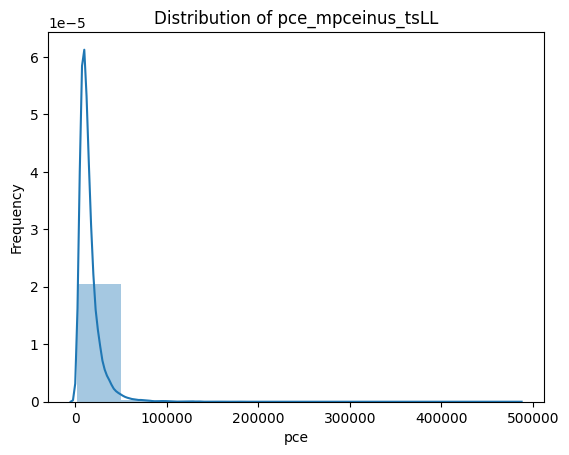

In [ ]:
#plotting distribution of pce by Final_Money
sns.distplot(merged_b7_b3['pce'], bins=10)
plt.xlabel('pce')
plt.ylabel('Frequency')
plt.title('Distribution of pce_mpceinus_tsLL')

#calculating correlation between pce and Final_Money
corr = merged_b7_b3['pce'].corr(merged_b7_b3['Final_Money'])
print('Correlation between pce and Final_Money:', corr)

The graphs above show high correlation between the feature and target for each pairing.

<Axes: xlabel='Total_Livestock', ylabel='pce'>

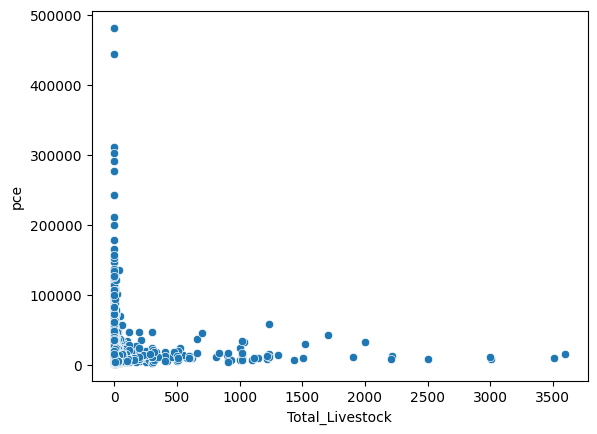

In [ ]:
#Total livestock compared to pce
sns.scatterplot(data=merged_b7_b3, x="Total_Livestock", y="pce")

<Axes: xlabel='Total_Spent_On_Livestock', ylabel='pce'>

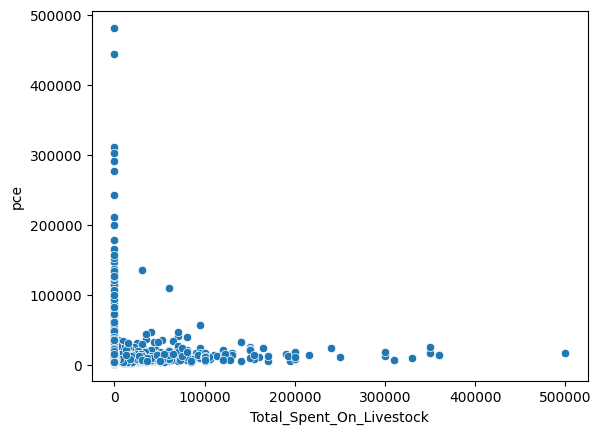

In [ ]:
#Money spent on livestock compared to pce
sns.scatterplot(data=merged_b7_b3, x="Total_Spent_On_Livestock", y="pce")

<Axes: xlabel='Total_Wet_Land_Used', ylabel='pce'>

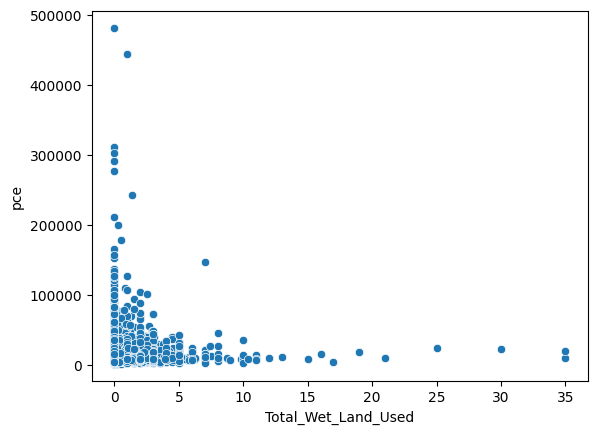

In [ ]:
#Total wetland vs pce
sns.scatterplot(data=merged_b7_b3, x="Total_Wet_Land_Used", y="pce")

<Axes: xlabel='Total_Dry_Land_Used', ylabel='pce'>

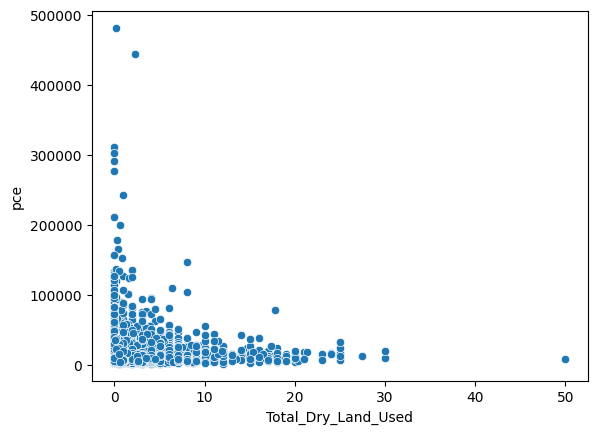

In [ ]:
#Total dryland vs pce
sns.scatterplot(data=merged_b7_b3, x="Total_Dry_Land_Used", y="pce")

<Axes: xlabel='Total_Orchard_Land_Used', ylabel='pce'>

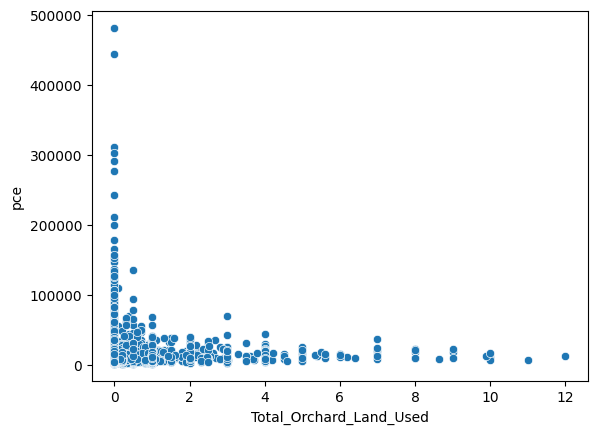

In [ ]:
#Total orchard vs pce
sns.scatterplot(data=merged_b7_b3, x="Total_Orchard_Land_Used", y="pce")

<Axes: xlabel='Total_Land_Used', ylabel='pce'>

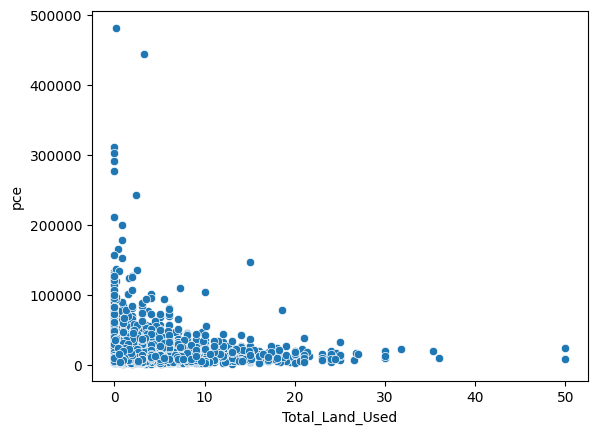

In [ ]:
#Total land vs pce
sns.scatterplot(data=merged_b7_b3, x="Total_Land_Used", y="pce")

<Axes: xlabel='Total_Spent_On_Land', ylabel='pce'>

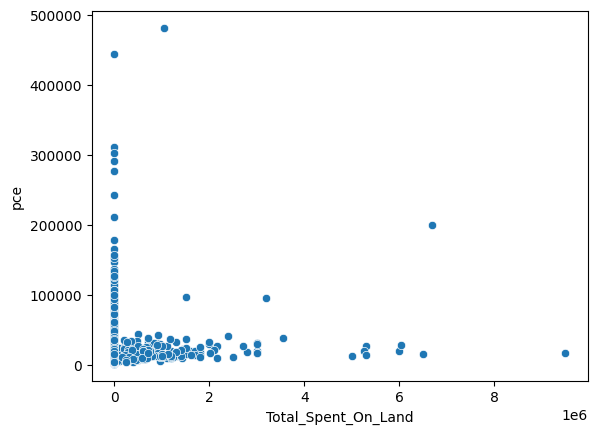

In [ ]:
#Money spent on land vs pce
sns.scatterplot(data=merged_b7_b3, x="Total_Spent_On_Land", y="pce")

##  Step 5-8:  For each of your questions:

    - Split the cleaned dataset to 80% for training data and 20% for testing test.
    - Train at least 2 different models with the justifications of how those models are selected.
    - Calculate at least 2 performance measurement for each model using both training data and testing data.
    - Compare the performance measurements among the models and determine which might be most appropriate for the question.

## 4. Split Data

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Question 1

In [ ]:
x11 = merged_b7_b2[['hs18__4','hs24','hs18__3','hs10','hs27','Total_Income','Final_Money','hs18','Yearly_Spent','Yearly_Total']]
y11 = merged_b7_b2['Major_Source_Income']

x11_train, x11_test, y11_train, y11_test = train_test_split(x11, y11, test_size=0.2)
print(f" x11 train shape {x11_train.shape}, x11 test value shape {x11_test.shape}")
print(f" y11 train shape {y11_train.shape}, y11 test value shape {y11_test.shape}")

 x11 train shape (10668, 10), x11 test value shape (2667, 10)
 y11 train shape (10668,), y11 test value shape (2667,)


In [ ]:
x12 = merged_b7_b2[['hs18__4','hs24','hs18__3','hs10','hs27','Total_Income','Final_Money','hs18','Yearly_Spent','Yearly_Total']]
y12 = merged_b7_b2['Class']

x12_train, x12_test, y12_train, y12_test = train_test_split(x12, y12, test_size=0.2)
print(f" x12 train shape {x12_train.shape}, x12 test value shape {x12_test.shape}")
print(f" y12 train shape {y12_train.shape}, y12 test value shape {y12_test.shape}")

 x12 train shape (10668, 10), x12 test value shape (2667, 10)
 y12 train shape (10668,), y12 test value shape (2667,)


In [ ]:
#Question 2

In [ ]:
x21 = merged_b7_b13[['h2', 'h1', 'Total_Outpatient_Expenses', 'Total_Inpatient_Expenses', 'Total_Income', 'Final_Money']]
y21 = merged_b7_b13['Major_Source_Income']

x21_train, x21_test, y21_train, y21_test = train_test_split(x21, y21, test_size=0.2)
print(f" x21 train shape {x21_train.shape}, x21 test value shape {x21_test.shape}")
print(f" y21 train shape {y21_train.shape}, y21 test value shape {y21_test.shape}")

 x21 train shape (42244, 6), x21 test value shape (10561, 6)
 y21 train shape (42244,), y21 test value shape (10561,)


In [ ]:
x22 = merged_b7_b13[['h2', 'h1', 'Total_Outpatient_Expenses', 'Total_Inpatient_Expenses', 'Total_Income', 'Final_Money']]
y22 = merged_b7_b13['Class']

x22_train, x22_test, y22_train, y22_test = train_test_split(x22, y22, test_size=0.2)
print(f" x22 train shape {x22_train.shape}, x22 test value shape {x22_test.shape}")
print(f" y22 train shape {y22_train.shape}, y22 test value shape {y22_test.shape}")

 x22 train shape (42244, 6), x22 test value shape (10561, 6)
 y22 train shape (42244,), y22 test value shape (10561,)


In [ ]:
#Question 3

In [ ]:
x31 = merged_b7_b3[['Total_Spent_On_Land', 'Total_Spent_LL', 'Total_Income', 'Final_Money', 'Total_Dry_Land_Used', 'Total_Land_Used']]
y31 = merged_b7_b3['pce_minus_tsLL']

x31_train, x31_test, y31_train, y31_test = train_test_split(x31, y31, test_size=0.2)
print(f" x31 train shape {x31_train.shape}, x31 test value shape {x31_test.shape}")
print(f" y31 train shape {y31_train.shape}, y31 test value shape {y31_test.shape}")

 x31 train shape (10668, 6), x31 test value shape (2667, 6)
 y31 train shape (10668,), y31 test value shape (2667,)


In [ ]:
x32 = merged_b7_b3[['Total_Spent_On_Land', 'Total_Spent_LL', 'Total_Income', 'Final_Money', 'Total_Dry_Land_Used', 'Total_Land_Used']]
y32 = merged_b7_b3['pce']

x32_train, x32_test, y32_train, y32_test = train_test_split(x32, y32, test_size=0.2)
print(f" x32 train shape {x32_train.shape}, x32 test value shape {x32_test.shape}")
print(f" y32 train shape {y32_train.shape}, y32 test value shape {y32_test.shape}")

 x32 train shape (10668, 6), x32 test value shape (2667, 6)
 y32 train shape (10668,), y32 test value shape (2667,)


## 5.  Sklearn Supervised Learning Models

https://scikit-learn.org/stable/supervised_learning.html


For each of your questions, select at least 2 models from at least 2  different categories:  

  - 1.1 (Linear Models)
  - 1.4 (SVM),1.6 (Nearest Neighbors), 1.11 ( Ensemble methods)
  - 1.17 (Neural Network Models)
  - Additional models:

(Refer the section numbers from the Sklean webpage above.)

### Question 1

-  Is Question 1 a regression or a classification problem?

Question 1 is a classification problem
- After reading the detail from the Sklearn Supervised Learning page, identify which model under each category you will use.
    - Model 1 from 1.1 (Linear Models): Linear Regression
    - Model 2 from 1.6 (Nearest Neighbors) :  K-Nearest Neighbors

###  Question 2

-  Is Question 2 a regression or a classification problem?

Question 2 is a classification problem

- After reading the detail from the Sklearn Supervised Learning page, identify which model under each category you will use.
    - Model 2 from 1.11 (Ensemble methods):  Random Forest
    - Additional models: 1.10 (Classification Method): Decision Tree

###  Question 3

-  Is Question 3 a regression or a classification problem?

Question 3 is a regression problem
- After reading the detail from the Sklearn Supervised Learning page, identify which model under each category you will use.
    - Model 1 from 1.1 (Linear Models): Orthogonal Matching Pursuit, Ridge Regression

## 7. Implementation of a model

- Step 1: Import the model
- Step 2: Train the model based on the training data
- Step 3: Predict using both training data and testing data
- Repeat Step 2 and Step 3 to tune the model  (Use the tuning models in Section 6 to help.)

In [ ]:
#Question 1:

In [ ]:
#using 'Major_Source_Income' as target:

In [ ]:
#Linear Regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg11 = linear_model.LinearRegression()
reg11.fit(x11_train, y11_train)
y_pred11 = reg11.predict(x11_test)

print("Coefficients: \n", reg11.coef_)
print("Mean Squared Error: %.2f" % mean_squared_error(y11_test, y_pred11))
print("R-Squared: %.2f" % r2_score(y11_test, y_pred11))
print(f"Training score: {reg11.score(x11_train, y11_train)*100}%")
print(f"Testing score: {reg11.score(x11_test, y11_test)*100}%")

Coefficients: 
 [ 1.18600490e-01  8.25438102e-02  2.68748040e-01  7.16923763e-02
  1.91335611e-01 -2.65046493e-06  2.62918351e-06 -1.18600490e-01
  1.98234400e-05 -2.43068480e-05]
Mean Squared Error: 0.55
R-Squared: 0.11
Training score: 9.55470621881137%
Testing score: 10.50300226170119%


In [ ]:
#Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn11 = KNeighborsClassifier(n_neighbors=3)
knn11.fit(x11_train, y11_train)
y_pred11 = knn11.predict(x11_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y11_test, y_pred11))
print("Accuracy: %.2f" % knn11.score(x11_test, y11_test))
print(f"Training score: {knn11.score(x11_train, y11_train)*100}%")
print(f"Testing score: {knn11.score(x11_test, y11_test)*100}%")

Mean Squared Error: 0.75
Accuracy: 0.67
Training score: 78.89951256092988%
Testing score: 67.04161979752531%


In [ ]:
#using 'Class' as target:

In [ ]:
#Linear Regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg12 = linear_model.LinearRegression()
reg12.fit(x12_train, y12_train)
y_pred12 = reg12.predict(x12_test)

print("Coefficients: \n", reg12.coef_)
print("Mean Squared Error: %.2f" % mean_squared_error(y12_test, y_pred12))
print("R-Squared: %.2f" % r2_score(y12_test, y_pred12))
print(f"Training score: {reg12.score(x12_train, y12_train)*100}%")
print(f"Testing score: {reg12.score(x12_test, y12_test)*100}%")

Coefficients: 
 [-2.15575056e-01 -3.98387122e-02 -2.55448566e-01 -8.23150840e-03
  1.37095176e-01  4.42113621e-06 -4.33183203e-06  2.15575056e-01
 -4.14049571e-05  4.51356488e-05]
Mean Squared Error: 0.53
R-Squared: 0.21
Training score: 18.03025369119332%
Testing score: 20.91935637255403%


In [ ]:
#Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn12 = KNeighborsClassifier(n_neighbors=3)
knn12.fit(x12_train, y12_train)
y_pred12 = knn12.predict(x12_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y12_test, y_pred12))
print("Accuracy: %.2f" % knn12.score(x12_test, y12_test))
print(f"Training score: {knn12.score(x12_train, y12_train)*100}%")
print(f"Testing score: {knn12.score(x12_test, y12_test)*100}%")

Mean Squared Error: 0.01
Accuracy: 0.99
Training score: 99.71878515185601%
Testing score: 99.25009373828271%


In [ ]:
#Question 2:

In [ ]:
#using 'Major_Source_Income' as target:

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc21 = RandomForestClassifier(n_estimators=100)
rfc21.fit(x21_train, y21_train)
y_pred21 = rfc21.predict(x21_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y21_test, y_pred21))
print("Accuracy: %.2f" % rfc21.score(x21_test, y21_test))
print(f"Training score: {rfc21.score(x21_train, y21_train)*100}%")
print(f"Testing score: {rfc21.score(x21_test, y21_test)*100}%")

Mean Squared Error: 0.25
Accuracy: 0.90
Training score: 100.0%
Testing score: 90.43651169396837%


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree21 = DecisionTreeClassifier()
dtree21.fit(x21_train, y21_train)
y_pred21 = dtree21.predict(x21_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y21_test, y_pred21))
print("Accuracy: %.2f" % dtree21.score(x21_test, y21_test))
print(f"Training score: {dtree21.score(x21_train, y21_train)*100}%")
print(f"Testing score: {dtree21.score(x21_test, y21_test)*100}%")

Mean Squared Error: 0.17
Accuracy: 0.95
Training score: 100.0%
Testing score: 94.81109743395511%


In [ ]:
#using 'Class' as target:

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc22 = RandomForestClassifier(n_estimators=100)
rfc22.fit(x22_train, y22_train)
y_pred22 = rfc22.predict(x22_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y22_test, y_pred22))
print("Accuracy: %.2f" % rfc22.score(x22_test, y22_test))
print(f"Training score: {rfc22.score(x22_train, y22_train)*100}%")
print(f"Testing score: {rfc22.score(x22_test, y22_test)*100}%")

Mean Squared Error: 0.00
Accuracy: 1.00
Training score: 100.0%
Testing score: 100.0%


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree22 = DecisionTreeClassifier()
dtree22.fit(x22_train, y22_train)
y_pred22 = dtree22.predict(x22_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y22_test, y_pred22))
print("Accuracy: %.2f" % dtree21.score(x22_test, y22_test))
print(f"Training score: {dtree21.score(x22_train, y22_train)*100}%")
print(f"Testing score: {dtree21.score(x22_test, y22_test)*100}%")

Mean Squared Error: 0.00
Accuracy: 0.24
Training score: 23.69567275826153%
Testing score: 23.747751159928036%


In [ ]:
#Question 3:

In [ ]:
#using 'pce_minus_tsLL' as target:

In [ ]:
#Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit
omp31 = OrthogonalMatchingPursuit(n_nonzero_coefs=3)
omp31.fit(x31_train, y31_train)
y_pred31 = omp31.predict(x31_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y31_test, y_pred31))
print("Accuracy: %.2f" % omp31.score(x31_test, y31_test))
print(f"Training score: {omp31.score(x31_train, y31_train)*100}%")
print(f"Testing score: {omp31.score(x31_test, y31_test)*100}%")

Mean Squared Error: 29028314409.43
Accuracy: 0.01
Training score: 0.2602689629169985%
Testing score: 1.3099369996372512%


In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge31 = Ridge(alpha=1.0)
ridge31.fit(x31_train, y31_train)
y_pred31 = ridge31.predict(x31_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y31_test, y_pred31))
print("Accuracy: %.2f" % ridge31.score(x31_test, y31_test))
print(f"Training score: {ridge31.score(x31_train, y31_train)*100}%")
print(f"Testing score: {ridge31.score(x31_test, y31_test)*100}%")

Mean Squared Error: 29041889168.00
Accuracy: 0.01
Training score: 0.2835709881567672%
Testing score: 1.2637857226559968%


In [ ]:
#using 'pce' as target:

In [ ]:
#Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit
omp32 = OrthogonalMatchingPursuit(n_nonzero_coefs=3)
omp32.fit(x32_train, y32_train)
y_pred32 = omp32.predict(x32_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y32_test, y_pred32))
print("Accuracy: %.2f" % omp32.score(x32_test, y32_test))
print(f"Training score: {omp32.score(x32_train, y32_train)*100}%")
print(f"Testing score: {omp32.score(x32_test, y32_test)*100}%")

Mean Squared Error: 0.00
Accuracy: 1.00
Training score: 100.0%
Testing score: 100.0%


In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge32 = Ridge(alpha=1.0)
ridge32.fit(x32_train, y32_train)
y_pred32 = ridge32.predict(x32_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y32_test, y_pred32))
print("Accuracy: %.2f" % ridge32.score(x32_test, y32_test))
print(f"Training score: {ridge32.score(x32_train, y32_train)*100}%")
print(f"Testing score: {ridge32.score(x32_test, y32_test)*100}%")

Mean Squared Error: 0.00
Accuracy: 1.00
Training score: 100.0%
Testing score: 100.0%


## 8.  Compare among Models

- Compare the performance metrics among models for the same question and determine which model performs the best.
- Show performance metrics numerically and graphically.
- Justify the selected models.

In [ ]:
#Question 1:

In [ ]:
#using 'Major_Source_Income' as target:

**Linear Regression:**

Mean Squared Error: 0.55

R-Squared: 0.10

Training score: 9.745161242585354%

Testing score: 9.961892531960792%

**Nearest Neighbors:**

Mean Squared Error: 0.75

Accuracy: 0.67

Training score: 78.94638170228721%

Testing score: 67.45406824146981%

For the linear regression model, the mean value is not very close to zero while for the nearest neighbors model the mean value is even farther from zero.  For the linear regression model the r-squared is .10 when ideally r-squared is somewhere from 0.5 - 0.99.  Due to this, even though the training score and testing score are very similar, the linear regression model is not as good as the nearest neighbor model which has an accuracy of .67.

Text(0.5, 1.0, 'Major Income Source Linear Regression Model for Question 1')

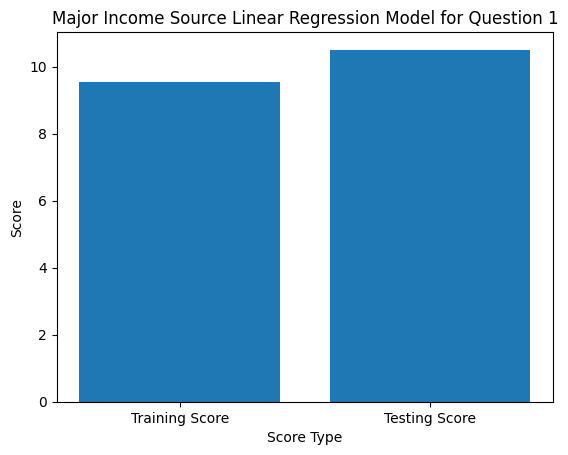

In [ ]:
x = ['Training Score', 'Testing Score']
y = [reg11.score(x11_train, y11_train)*100, reg11.score(x11_test, y11_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Major Income Source Linear Regression Model for Question 1')

Text(0.5, 1.0, 'Major Income Source Nearest Neighbor Model for Question 1')

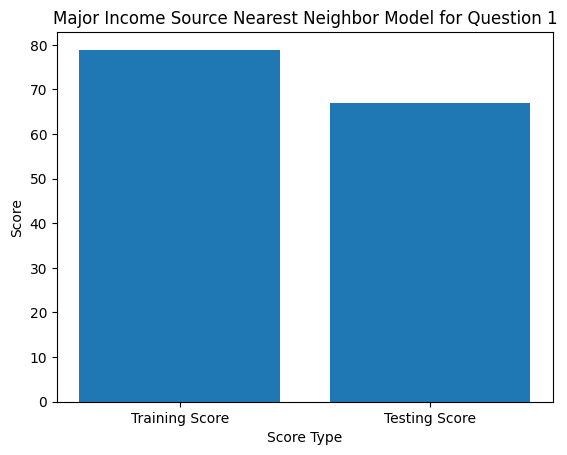

In [ ]:
x = ['Training Score', 'Testing Score']
y = [knn11.score(x11_train, y11_train)*100, knn11.score(x11_test, y11_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Major Income Source Nearest Neighbor Model for Question 1')


In [ ]:
#using 'Class' as target:

**Linear Regression**:

Mean Squared Error: 0.53

R-Squared: 0.20

Training score: 18.197617368255393%

Testing score: 20.192246800792233%

**Nearest Neighbors**:

Mean Squared Error: 0.01

Accuracy: 0.99

Training score: 99.73753280839895%

Testing score: 99.43757030371204%

For the linear regression model, the mean value is not very close to zero while for the nearest neighbors model the mean value is very close to zero.  For the linear regression model the r-squared is .20 when ideally r-squared is somewhere from 0.5 - 0.99.  The accuracy for the Nearest Neighbors model is .99 which is very good, so the nearest neighbors model is much better in this case.

Text(0.5, 1.0, 'Class Linear Regression Model for Question 1')

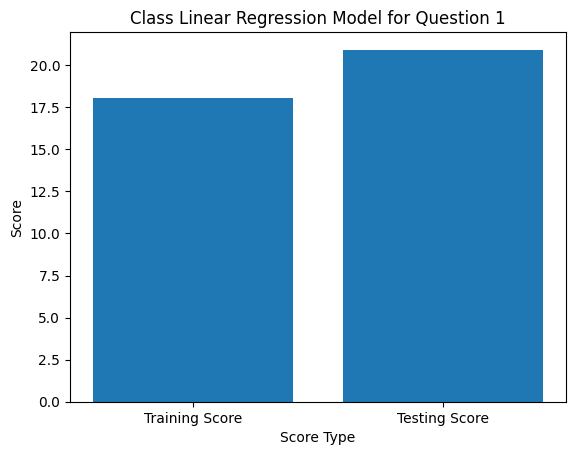

In [ ]:
x = ['Training Score', 'Testing Score']
y = [reg12.score(x12_train, y12_train)*100, reg12.score(x12_test, y12_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Class Linear Regression Model for Question 1')


Text(0.5, 1.0, 'Class Nearest Neighbor Model for Question 1')

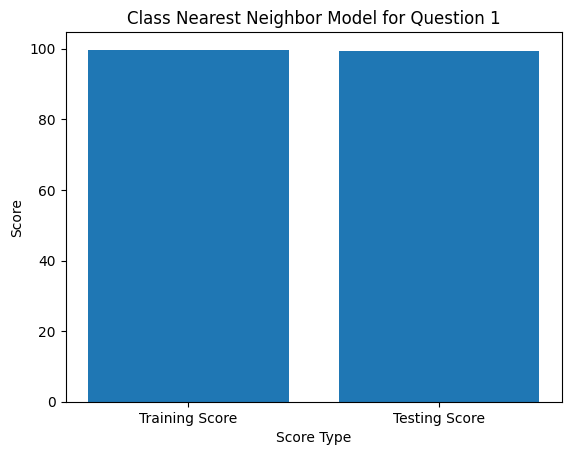

In [ ]:
x = ['Training Score', 'Testing Score']
y = [knn12.score(x12_train, y12_train)*100, knn12.score(x12_test, y12_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Class Nearest Neighbor Model for Question 1')


In [ ]:
#Question 2:

In [ ]:
#using 'Major_Source_Income' as target:

**Random Forest:**

Mean Squared Error: 0.23

Accuracy: 0.91

Training score: 99.99526559984851%

Testing score: 90.86260770760344%

**Decision Tree:**

Mean Squared Error: 0.15

Accuracy: 0.95

Training score: 100.0%

Testing score: 95.16144304516617%

Seeing as though the accuracy and the mean squared error are both closer to their desired values for the Decision Tree Model, that model's performance is better than the Random Forest Model.

Text(0.5, 1.0, 'Major Income Source Random Forest Model for Question 2')

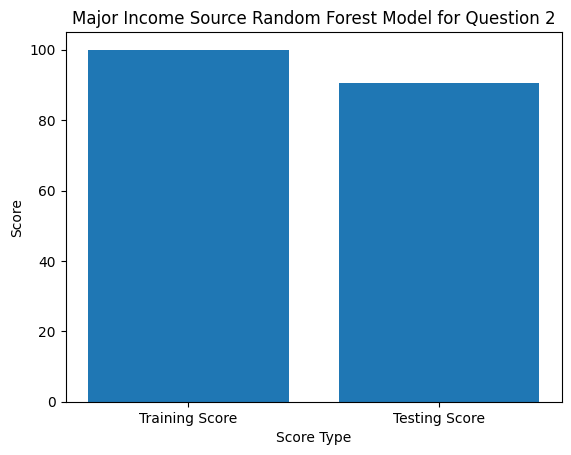

In [ ]:
x = ['Training Score', 'Testing Score']
y = [rfc21.score(x21_train, y21_train)*100, rfc21.score(x21_test, y21_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Major Income Source Random Forest Model for Question 2')

Text(0.5, 1.0, 'Major Income Source Decision Tree Model for Question 2')

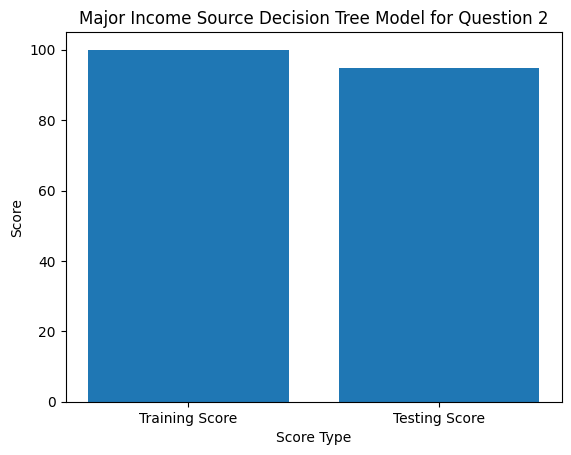

In [ ]:
x = ['Training Score', 'Testing Score']
y = [dtree21.score(x21_train, y21_train)*100, dtree21.score(x21_test, y21_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Major Income Source Decision Tree Model for Question 2')


In [ ]:
#using 'Class' as target:

**Random Forest**

Mean Squared Error: 0.00

Accuracy: 1.00

Training score: 100.0%

Testing score: 100.0%

**Decision Tree**

Mean Squared Error: 0.00

Accuracy: 0.24

Training score: 23.617555155761767%

Testing score: 24.36322317962314%

Since both the Mean Squared Error and the Accuracy are our desired values for the Random Forest Model, that model's performance is better than the Decision Trees.

Text(0.5, 1.0, 'Class Random Forest Model for Question 2')

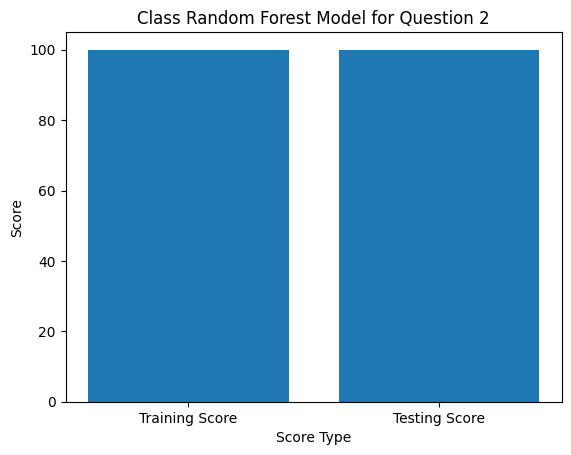

In [ ]:
x = ['Training Score', 'Testing Score']
y = [rfc22.score(x22_train, y22_train)*100, rfc22.score(x22_test, y22_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Class Random Forest Model for Question 2')

Text(0.5, 1.0, 'Class Decision Tree Model for Question 2')

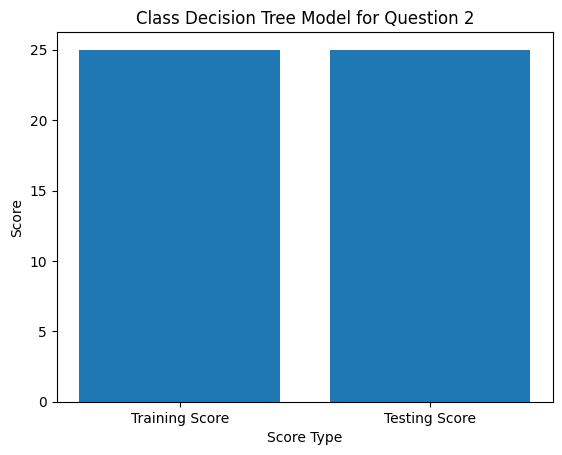

In [ ]:
x = ['Training Score', 'Testing Score']
y = [dtree22.score(x22_train, y22_train)*25, dtree22.score(x22_test, y22_test)*25]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Class Decision Tree Model for Question 2')

In [ ]:
#Question 3:

We would like to preface that we know the models for question 3 are not what we wanted. We had a hard time trying to get models to work with this data and test-train set. The results are consequently nothing like we had hoped for. :\(

In [ ]:
#using 'pce_minus_tsLL' as target:

**Orthogonal Matching Pursuit:**

Mean Squared Error: 25438411386.67

Accuracy: 0.01

Training score: 0.37500222681235984%

Testing score: 0.6393701900824%



**Ridge Regression:**

Mean Squared Error: 25451932120.55

Accuracy: 0.01

Training score: 0.4001650606826779%

Testing score: 0.5865591629595435%

For both the orthogonal matching persuit and the ridge regression models, the mean squared error was extremly large. This would incinuate that the model will be extremly innacurate. The accuracy of the orthogonal matching persuit model is 0.01 1 and the training and testing scores are 0.375% and 0.640% respectively. The accuracy of the ridge regression model is 0.01 1 and the training and testing scores are 0.400% and 0.586% respectively. Based on these outputs, neither of models would be useful to use, and another model should be choosen.

Text(0.5, 1.0, 'pce_minus_tsLL Orthogonal Matching Pursuit Model for Question 3')

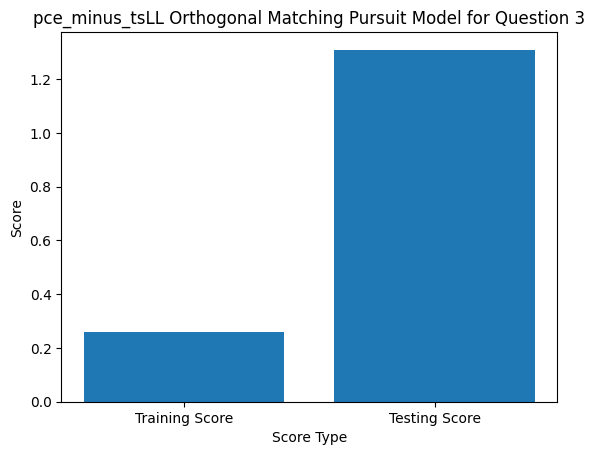

In [ ]:
x = ['Training Score', 'Testing Score']
y = [omp31.score(x31_train, y31_train)*100, omp31.score(x31_test, y31_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('pce_minus_tsLL Orthogonal Matching Pursuit Model for Question 3')

Text(0.5, 1.0, 'pce_minus_tsLL Ridge Regression Model for Question 3')

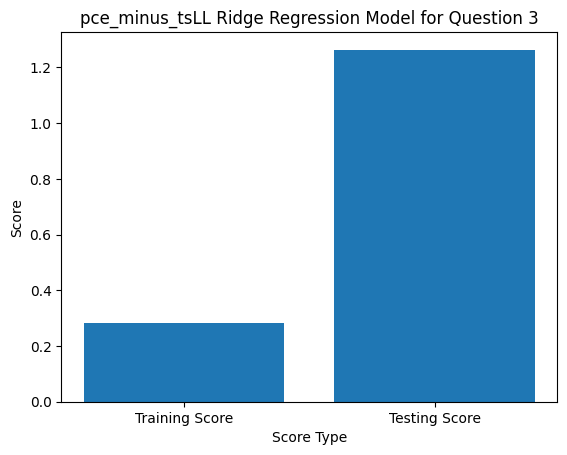

In [ ]:
x = ['Training Score', 'Testing Score']
y = [ridge31.score(x31_train, y31_train)*100, ridge31.score(x31_test, y31_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('pce_minus_tsLL Ridge Regression Model for Question 3')

In [ ]:
#using 'pce' as target:

**Orthogonal Matching Pursuit:**

Mean Squared Error: 0.00

Accuracy: 1.00

Training score: 100.0%

Testing score: 100.0%



**Ridge Regression:**

Mean Squared Error: 0.00

Accuracy: 1.00

Training score: 100.0%

Testing score: 100.0%

Text(0.5, 1.0, 'pce Orthogonal Matching Pursuit Model for Question 3')

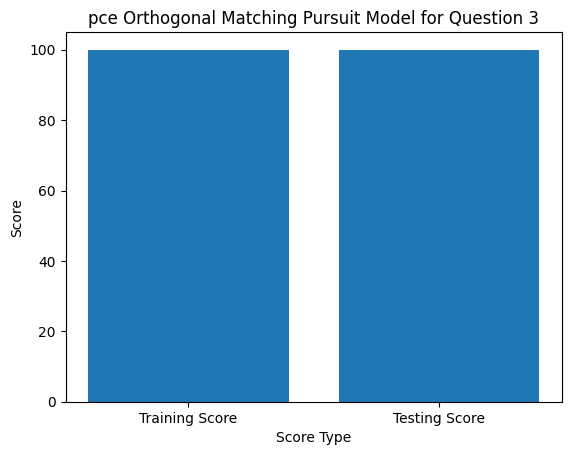

In [ ]:
x = ['Training Score', 'Testing Score']
y = [omp32.score(x32_train, y32_train)*100, omp32.score(x32_test, y32_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('pce Orthogonal Matching Pursuit Model for Question 3')

Text(0.5, 1.0, 'pce Ridge Regression Model for Question 3')

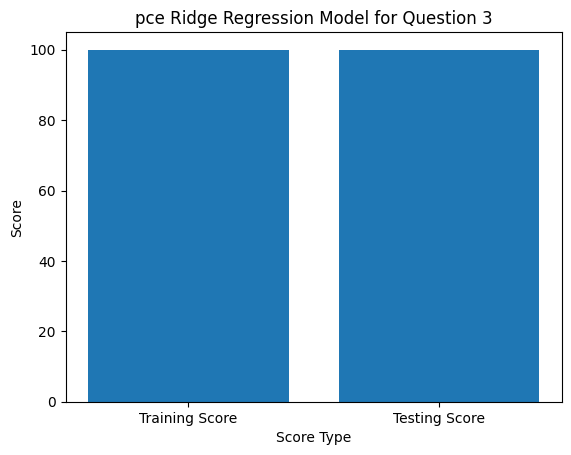

In [ ]:
x = ['Training Score', 'Testing Score']
y = [ridge32.score(x32_train, y32_train)*100, ridge32.score(x32_test, y32_test)*100]

plt.bar(x, y)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('pce Ridge Regression Model for Question 3')

For both the orthogonal matching persuit and the ridge regression models, the mean squared error was 0. It is know that a smaller mse is best, but in this case it is just not logical. The accuracy of the models is 1 and the training and testing scores are 100%. This is not an accurate representation of the data. Neither of them would be useful to use and gain anything from.

As stated erlier, we know that neither of these models are what should be used for test-training the data for this specific question.

## 9.  Conclusions:

What do you learn about Bhutan in the selected aspect based on this process?

Question 1: Do the living conditions differ based on the respondents major source of income or social income class?
- The living conditions differ based on the respondents income class. The lower the income class the worse the living conditions are, and vice versa with the higher income class.


Question 2: Does health and well-being differ based on the respondents’ source of income or social income class?
- Health and well-being differs based on the respondents’ major source of income. Thus different major sources of income mean different health states.


Question 3:Does the amount of livestock and land owned correlate with the respondents’ pce?
- The amount of livestock and land owned correlates with the respondents’ pce. The more livestock and land owend, the higher the pce for the respondent was.

**Ben's Testing Area**

In [ ]:
xnb = merged_b7_b2[['hs18__4','hs24','hs18__3','hs10','hs27','Total_Income','Final_Money','hs18','Yearly_Spent','Yearly_Total']]
ynb = merged_b7_b2['Major_Source_Income']

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(xnb, ynb, test_size=0.6, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))


model = GaussianNB()

model.fit(X_train, y_train);

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)


ridge_ = Ridge(alpha=1.0)
ridge_.fit(X_train, y_train)
y_pred = model.predict(X_test)
#y_pred = ridge_.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))
print("Accuracy:", accuray)
#print("Accuracy: %.2f" % ridge_.score(X_test, y_test))
print("F1 Score:", f1)
print(f"Training score: {ridge_.score(X_train, y_train)*100}%")
print(f"Testing score: {ridge_.score(X_test, y_test)*100}%")

Number of mislabeled points out of a total 8001 points : 2482
Mean Squared Error: 0.83
Accuracy: 0.6897887764029497
F1 Score: 0.8095262426751959
Training score: 10.53178518501623%
Testing score: 9.204956070942515%
